# Основы анализа данных в Python

*Алла Тамбовцева*

## Практикум 5. Визуализация данных: часть 2

Импортируем библиотеку `pandas` и модуль `pyplot` из графической библиотеки `matplotlib`:

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

В файле Excel хранятся результаты выборов в Государственную Думу 2021 года. Загрузим данные с третьего листа файла Excel (`sheet_name = 2`).

In [2]:
res = pd.read_excel("proportional_w_uiks.xlsx", sheet_name = 2)

### Сюжет 1: подготовка данных

* Удаление и переименование столбцов
* Добавление новых столбцов
* Группировка и агрегирование
* Вычисление максимума в каждой строке

Посмотрим на названия столбцов в `res`:

In [3]:
print(res.columns)

Index(['level', 'region', 'district', 'oik', 'tik', 'uik', 'uiknum',
       'Число недействительных избирательных бюллетеней',
       'Число действительных избирательных бюллетеней',
       'Число утраченных избирательных бюллетеней',
       'Число избирательных бюллетеней, не учтенных при получении',
       '1. Политическая партия "КОММУНИСТИЧЕСКАЯ ПАРТИЯ РОССИЙСКОЙ ФЕДЕРАЦИИ"',
       '2. Политическая партия "Российская экологическая партия "ЗЕЛЁНЫЕ"',
       '3. Политическая партия ЛДПР – Либерально-демократическая партия России',
       '4. Политическая партия "НОВЫЕ ЛЮДИ"',
       '5. Всероссийская политическая партия "ЕДИНАЯ РОССИЯ"',
       '6. Партия СПРАВЕДЛИВАЯ РОССИЯ – ЗА ПРАВДУ',
       '7. Политическая партия "Российская объединенная демократическая партия "ЯБЛОКО"',
       '8. Всероссийская политическая партия "ПАРТИЯ РОСТА"',
       '9. Политическая партия РОССИЙСКАЯ ПАРТИЯ СВОБОДЫ И СПРАВЕДЛИВОСТИ',
       '10. Политическая партия КОММУНИСТИЧЕСКАЯ ПАРТИЯ КОММУНИСТЫ РОСС

Так как некоторые столбцы нам не понадобятся, можем их удалить, воспользовавшись методом `.drop()`. В исходном датафрейме `res` их оставим, а результат после удаления сохраним в новый датафрейм `small`:

In [4]:
small = res.drop(columns = ["level", "oik", "uiknum", 
                           "Число утраченных избирательных бюллетеней",
                           "Число избирательных бюллетеней, не учтенных при получении"])
small.head()

,region,district,tik,uik,Число недействительных избирательных бюллетеней,Число действительных избирательных бюллетеней,"1. Политическая партия ""КОММУНИСТИЧЕСКАЯ ПАРТИЯ РОССИЙСКОЙ ФЕДЕРАЦИИ""","2. Политическая партия ""Российская экологическая партия ""ЗЕЛЁНЫЕ""",3. Политическая партия ЛДПР – Либерально-демократическая партия России,"4. Политическая партия ""НОВЫЕ ЛЮДИ""","5. Всероссийская политическая партия ""ЕДИНАЯ РОССИЯ""",6. Партия СПРАВЕДЛИВАЯ РОССИЯ – ЗА ПРАВДУ,"7. Политическая партия ""Российская объединенная демократическая партия ""ЯБЛОКО""","8. Всероссийская политическая партия ""ПАРТИЯ РОСТА""",9. Политическая партия РОССИЙСКАЯ ПАРТИЯ СВОБОДЫ И СПРАВЕДЛИВОСТИ,10. Политическая партия КОММУНИСТИЧЕСКАЯ ПАРТИЯ КОММУНИСТЫ РОССИИ,"11. Политическая партия ""Гражданская Платформа""",12. Политическая партия ЗЕЛЕНАЯ АЛЬТЕРНАТИВА,"13. ВСЕРОССИЙСКАЯ ПОЛИТИЧЕСКАЯ ПАРТИЯ ""РОДИНА""",14. ПАРТИЯ ПЕНСИОНЕРОВ
0,Алтайский край,Алтайский край – Барнаульский,Алтайская,УИК №592,4,174,57,2,11,16,49,26,0,1,2,4,0,2,0,4
1,Алтайский край,Алтайский край – Барнаульский,Алтайская,УИК №593,11,558,189,8,43,46,174,60,0,1,4,14,0,2,3,14
2,Алтайский край,Алтайский край – Барнаульский,Алтайская,УИК №594,7,457,157,0,46,40,141,35,4,1,3,13,0,2,1,14
3,Алтайский край,Алтайский край – Барнаульский,Алтайская,УИК №595,23,939,303,4,77,85,339,76,4,2,2,18,0,2,2,25
4,Алтайский край,Алтайский край – Барнаульский,Алтайская,УИК №596,17,826,264,3,93,76,282,57,5,2,4,19,0,3,2,16


Переименуем оставшиеся столбцы, так как названия у них слишком длинные. Просто сохраним в атрибут `.columns` список новых названий:

In [5]:
small.columns = ["region", "district", "tik", "uik", 
                 "invalid", "valid", "КПРФ", "ЗЕЛЁНЫЕ", 
                 "ЛДПР", "НЛ", "ЕР", "СР", "ЯБЛОКО", 
                 "ПАРТИЯ РОСТА", "РПСС", "КП", "ГП", 
                 "ЗЕЛЁНАЯ АЛЬТЕРНАТИВА", "РОДИНА", 
                 "ПП"]

Добавим столбец `turnout` с явкой в абсолютных значениях (число бюллетеней, не проценты):

In [6]:
small["turnout"] = small["invalid"] + small["valid"]
small.head()

,region,district,tik,uik,invalid,valid,КПРФ,ЗЕЛЁНЫЕ,ЛДПР,НЛ,...,СР,ЯБЛОКО,ПАРТИЯ РОСТА,РПСС,КП,ГП,ЗЕЛЁНАЯ АЛЬТЕРНАТИВА,РОДИНА,ПП,turnout
0,Алтайский край,Алтайский край – Барнаульский,Алтайская,УИК №592,4,174,57,2,11,16,...,26,0,1,2,4,0,2,0,4,178
1,Алтайский край,Алтайский край – Барнаульский,Алтайская,УИК №593,11,558,189,8,43,46,...,60,0,1,4,14,0,2,3,14,569
2,Алтайский край,Алтайский край – Барнаульский,Алтайская,УИК №594,7,457,157,0,46,40,...,35,4,1,3,13,0,2,1,14,464
3,Алтайский край,Алтайский край – Барнаульский,Алтайская,УИК №595,23,939,303,4,77,85,...,76,4,2,2,18,0,2,2,25,962
4,Алтайский край,Алтайский край – Барнаульский,Алтайская,УИК №596,17,826,264,3,93,76,...,57,5,2,4,19,0,3,2,16,843


Посмотрим на размерность датафрейма `small`:

In [7]:
print(small.shape)

(96325, 21)


В датафрейме хранятся данные в разрезе избирательных участков, одна строка таблицы – один участок. Чтобы перейти к анализу результатов выборов по регионам, данные нужно агрегировать. Каким образом? Так как все числовые столбцы здесь в одинаковых единицах измерения – количество бюллетеней – для получения данных по регионам, строки нужно сгруппировать по региону и для каждого региона посчитать сумму по каждому столбцу:

In [8]:
# в новых версия pandas аргумент numeric_only=True обязателен,
# чтобы игнорировались нечисловые столбцы,
# если у вас более старая версия (выдается ошибка), 
# оставьте просто .sum()

regs = small.groupby("region").sum(numeric_only=True)
regs.head()

,invalid,valid,КПРФ,ЗЕЛЁНЫЕ,ЛДПР,НЛ,ЕР,СР,ЯБЛОКО,ПАРТИЯ РОСТА,РПСС,КП,ГП,ЗЕЛЁНАЯ АЛЬТЕРНАТИВА,РОДИНА,ПП,turnout
region,,,,,,,,,,,,,,,,,
Алтайский край,18976,720484,225860,4618,67212,45010,248971,72825,7225,1760,3957,16143,648,3483,4010,18762,739460
Амурская область,8786,245872,67622,1853,36080,17927,87390,14120,1389,658,1828,5798,336,1444,1330,8097,254658
Архангельская область,9386,355393,68206,3718,47143,35305,117497,40732,15496,1307,2996,3326,439,2992,4315,11921,364779
Астраханская область,7850,307608,56279,1684,16833,17913,151742,38484,1918,911,2026,5362,666,1561,3811,8418,315458
Белгородская область,11532,712488,135168,5675,52374,39920,373965,49781,3989,1798,4654,10862,917,3907,5028,24450,724020


Проверяем размерность:

In [9]:
regs.shape # все ок

(85, 17)

Как перейти от абсолютных чисел к процентам? Процент голосов, полученных на выборах партией, вычисляется от явки. Значит, нам нужно написать функцию, которая будет делить каждый столбец с результами партии на явку и домножать ответ на 100. Однако сначала выберем подходящие столбцы, столбцы с голосами за разные партии. Для этого, чтобы не писать длинный список, можно воспользоваться методами `.iloc[]` или `.loc[]`:

* метод `.iloc[]` выбирает столбцы по индексам;
* метод `.loc[]` выбирает столбцы по названиям.

На первом месте в квадратных скобках указываются индексы/названия выбираемых строк, на втором – выбираемых столбцов. Если мы выбираем все строки/все столбцы, можем указать полный срез `:`:

In [10]:
# все строки, первый столбец с индексом 0
regs.iloc[:, 0]

region
Алтайский край                     18976
Амурская область                    8786
Архангельская область               9386
Астраханская область                7850
Белгородская область               11532
                                   ...  
Ямало-Ненецкий автономный округ     3555
Ярославская область                 6781
город Москва                       49581
город Санкт-Петербург              36377
город Севастополь                   2960
Name: invalid, Length: 85, dtype: int64

In [11]:
# все столбцы, вторая строка с индексом 1
regs.iloc[1, :]

invalid                   8786
valid                   245872
КПРФ                     67622
ЗЕЛЁНЫЕ                   1853
ЛДПР                     36080
НЛ                       17927
ЕР                       87390
СР                       14120
ЯБЛОКО                    1389
ПАРТИЯ РОСТА               658
РПСС                      1828
КП                        5798
ГП                         336
ЗЕЛЁНАЯ АЛЬТЕРНАТИВА      1444
РОДИНА                    1330
ПП                        8097
turnout                 254658
Name: Амурская область, dtype: int64

Выберите, используя

* метод `.loc[]`
* метод `.iloc[]`

столбцы, которые соответствуют количеству голосов за каждую партию и сохраните в датафрейм `parties`.

In [12]:
parties = regs.loc[:, "КПРФ" : "ПП"]

In [13]:
parties = regs.iloc[:, 2:-1]

**NB.** В методе `.loc[]` в срезах правый конец всегда включается (столбец `ПП` тоже выбран), в методе `.iloc[]` – всегда исключается, как в обычных числовых срезах в списках.

Напишите lambda-функцию, которая вычисляет процент голосов от явки и примените ее ко всем столбцам в `parties`, используя метод `.apply()`. Полученный датафрейм с процентами голосов назовите `regs_perc`.

In [14]:
regs_perc = parties.apply(lambda x: x / regs["turnout"] * 100)

Добавим столбец `winner` с названием партии, которая получила большинство голосов в регионе. Чтобы это сделать, нужно определить максимум по каждой строке. И даже не сам максимум, а название столбца, в котором этот максимум по строке достигается. Для этого в `pandas` есть универсальный метод `.idxmax()`:

In [15]:
# axis = 1, так как ищем название столбца (0 – строка, 1 – столбец)

regs_perc["winner"] = regs_perc.idxmax(axis=1)

### Сюжет 2: построение круговой и кольцевой диаграммы

Выведите таблицу частот для нового столбца `winner` и сохраните ее в переменную `tab`:

In [16]:
tab = regs_perc["winner"].value_counts()

Постройте на основе полученной таблицы круговую диаграмму – та же логика, что и для столбиковой, только функция `pie()` вместо `bar()`.

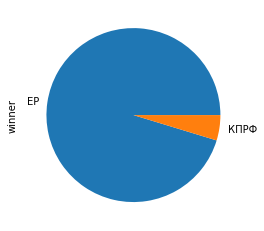

In [17]:
# ради всего святого, не стройте базовые круговые диаграммы, это катастрофа,
# но кольцевую без круговой не построишь

tab.plot.pie();

Доработаем график! Сначала разберем таблицу частот на части, так будет удобнее:

In [18]:
labs = tab.index
vals = tab.values

print(labs)
print(vals)

Index(['ЕР', 'КПРФ'], dtype='object')
[81  4]


Создадим заготовку для графика, пользуясь возможностями `matplotlib`:

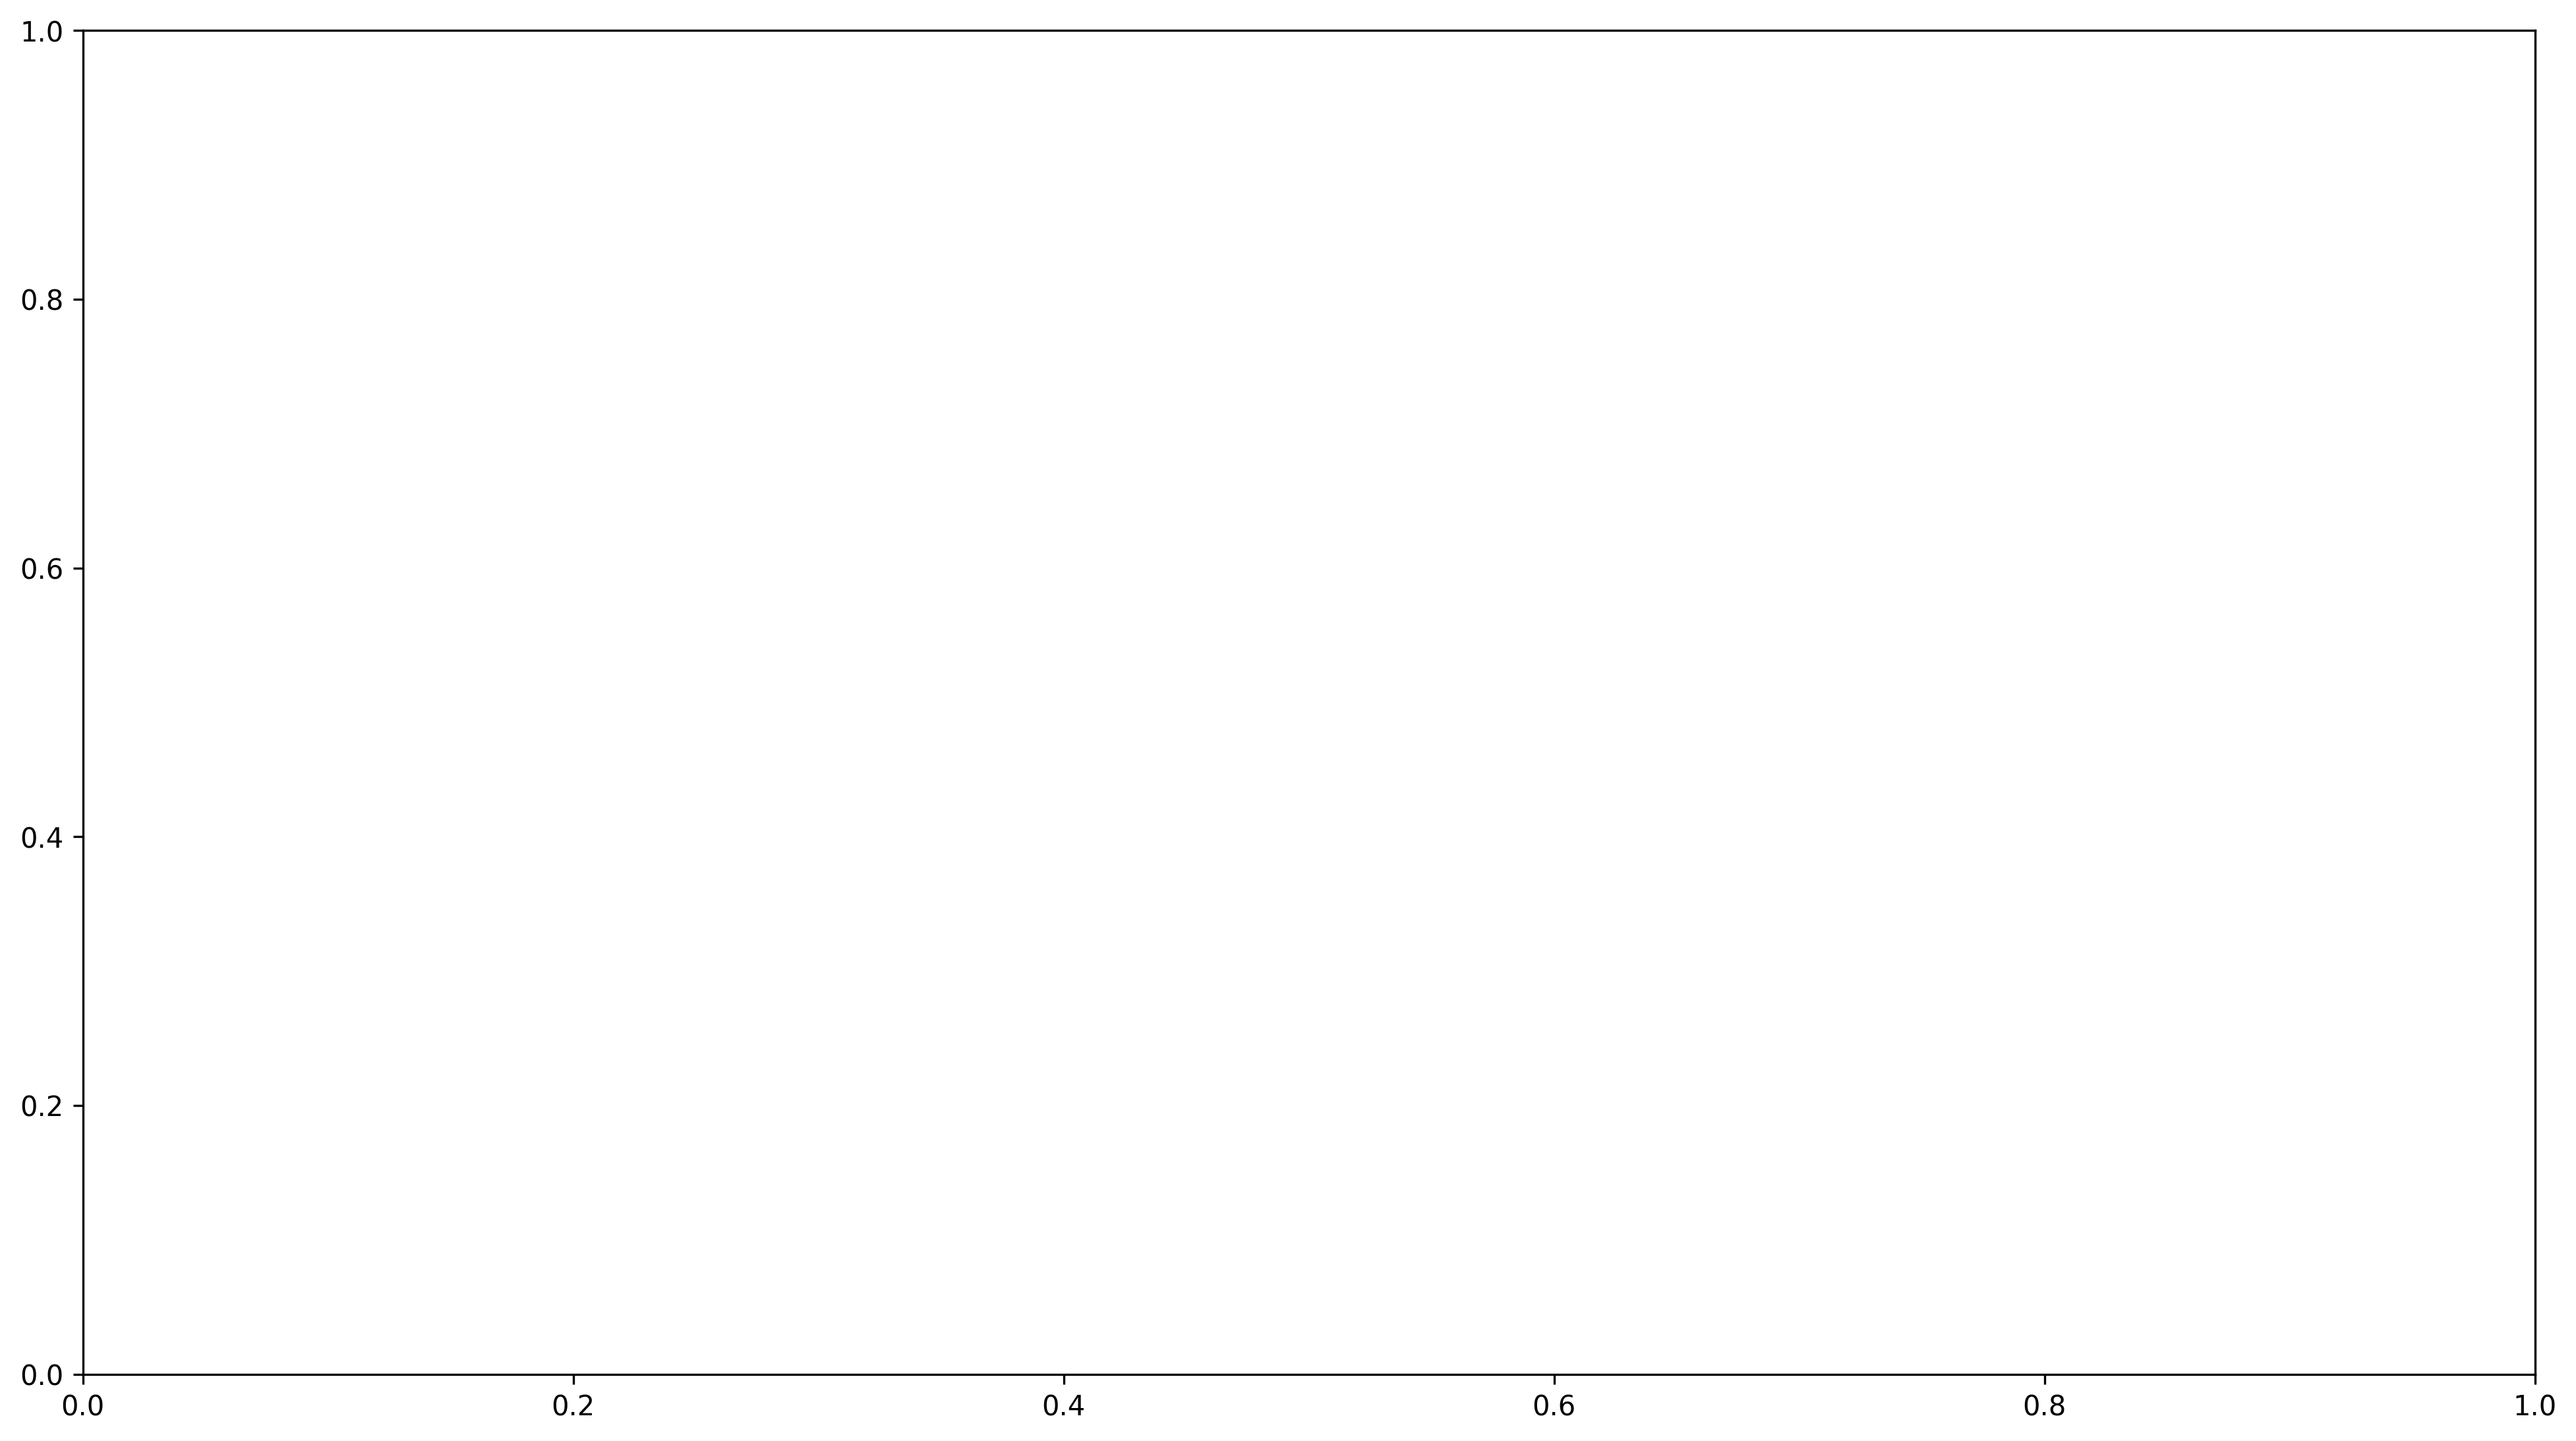

In [19]:
# fig – картинка, ее потом выгрузим в файл
# ax – оси, в которые вписываем элементы графика и редактируем
# figsize – размер изображения в дюймах
# dpi – разрешение, в точках на дюйм

fig, ax = plt.subplots(figsize = (16, 9), dpi = 300)

Функция `subplots()` создает «заготовку» для графика и возвращает пару объектов:

* «материальное» изображение, которое можно выгрузить в файл, как будто бы скрин с графиком;
* набор осей для графиков внутри этого изображения.

Так как к этим объектам нужно будет обращаться отдельно, мы их сохранили в переменные. Изображение – в переменную `fig` (можно любое название, обычно оставляют `fig` от *figure*), а набор осей – в переменную `ax` (тоже часто используют именно такое название, от *axes*).

Так как внутри одной картинки может быть несколько графиков (например, в одном окне столбиковая диаграмма, а в другом – круговая), функция «формулируется» во множественном числе, `subplots()`, а не `subplot()`. 
Однако нам нужен один график, поэтому достаточно просто в оси `ax` поместить подходящую диаграмму.

К осям `ax` применим метод `.pie()`, на первом месте укажем частоты, на втором – названия категорий:

([<matplotlib.patches.Wedge at 0x125bcf810>,
 [Text(-1.0880007706360741, 0.1620318582727145, 'ЕР'),
  Text(1.0880007725323886, -0.16203184553946726, 'КПРФ')])

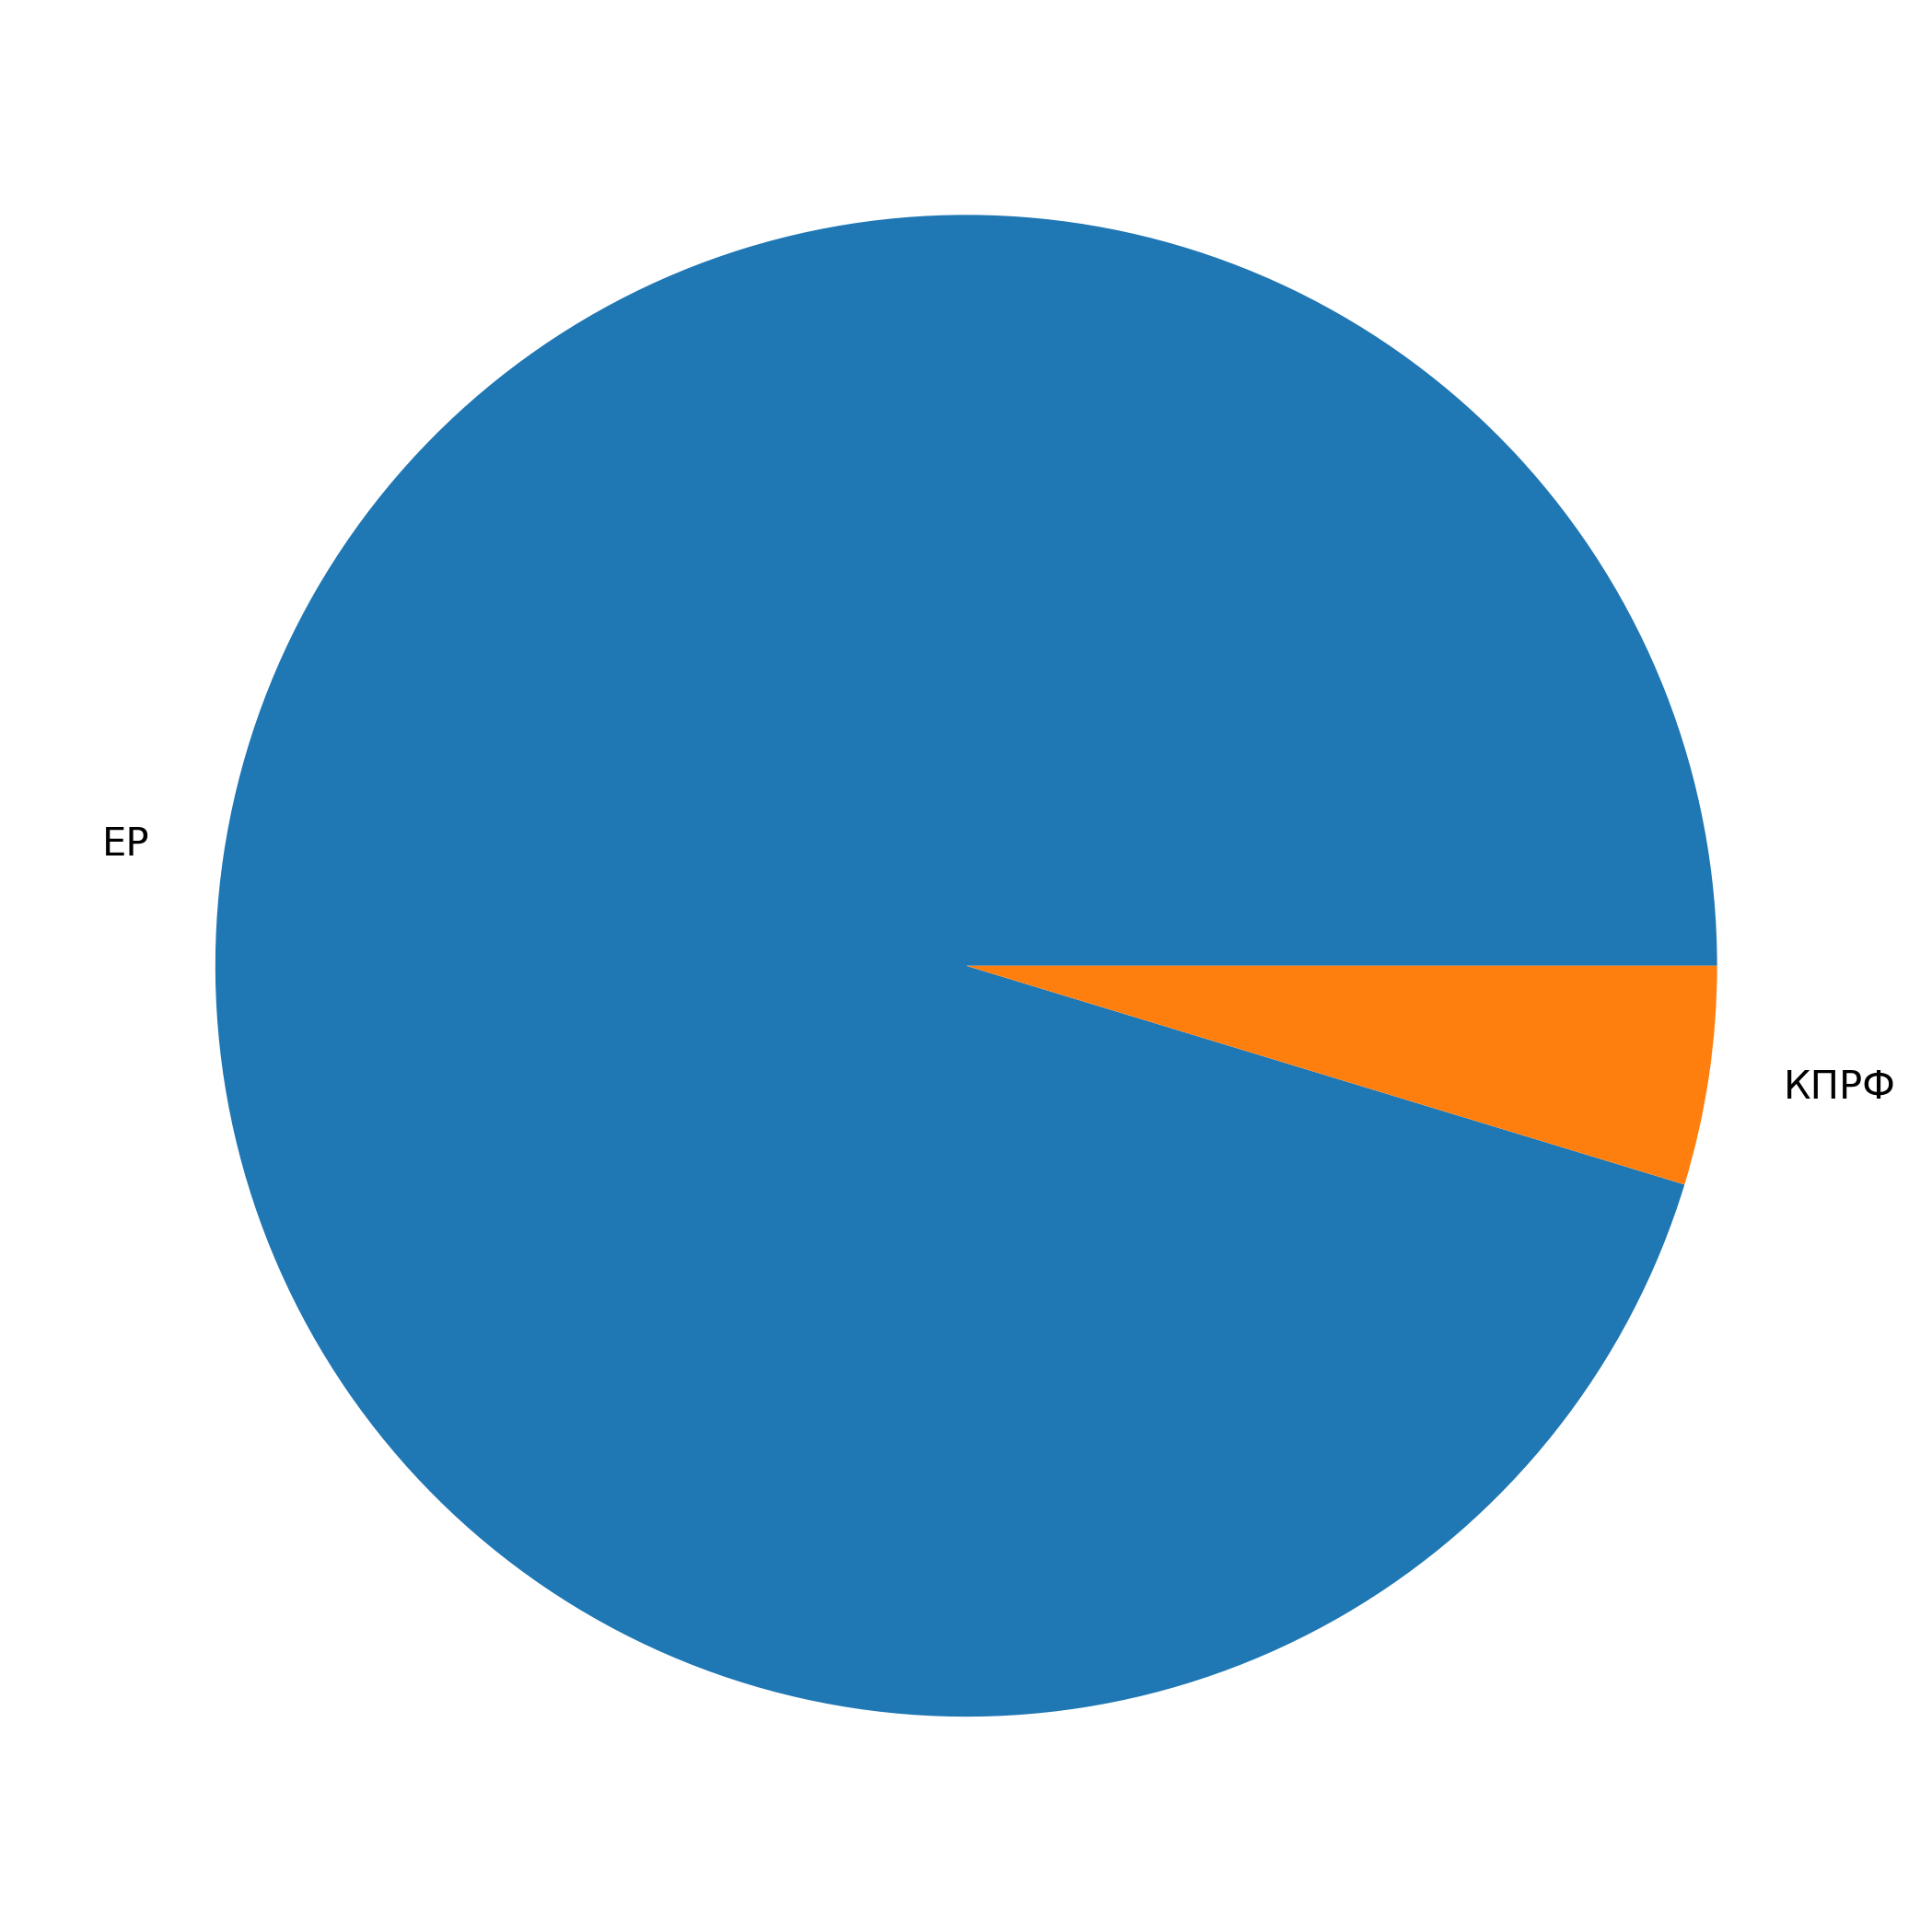

In [20]:
fig, ax = plt.subplots(figsize = (16, 9), dpi = 300)
ax.pie(vals, labels = labs)

**NB.** В коде выше специально после `.pie()` нет точки с запятой, в выдаче перед графиком перечислены те объекты, которые создаются для построения круговой диаграммы:

* набор из объектов типа `matplotlib.patches.Wedge` – два сектора круга (один для ЕР, другой – для КПРФ);
* набор из объектов типа `Text` – подписи к этим секторам.

В дальнейшем, если мы захотим корректировать отдельные элементы диаграммы, нам придется «разбирать» ее на такие части.

Добавим подписи с процентами:

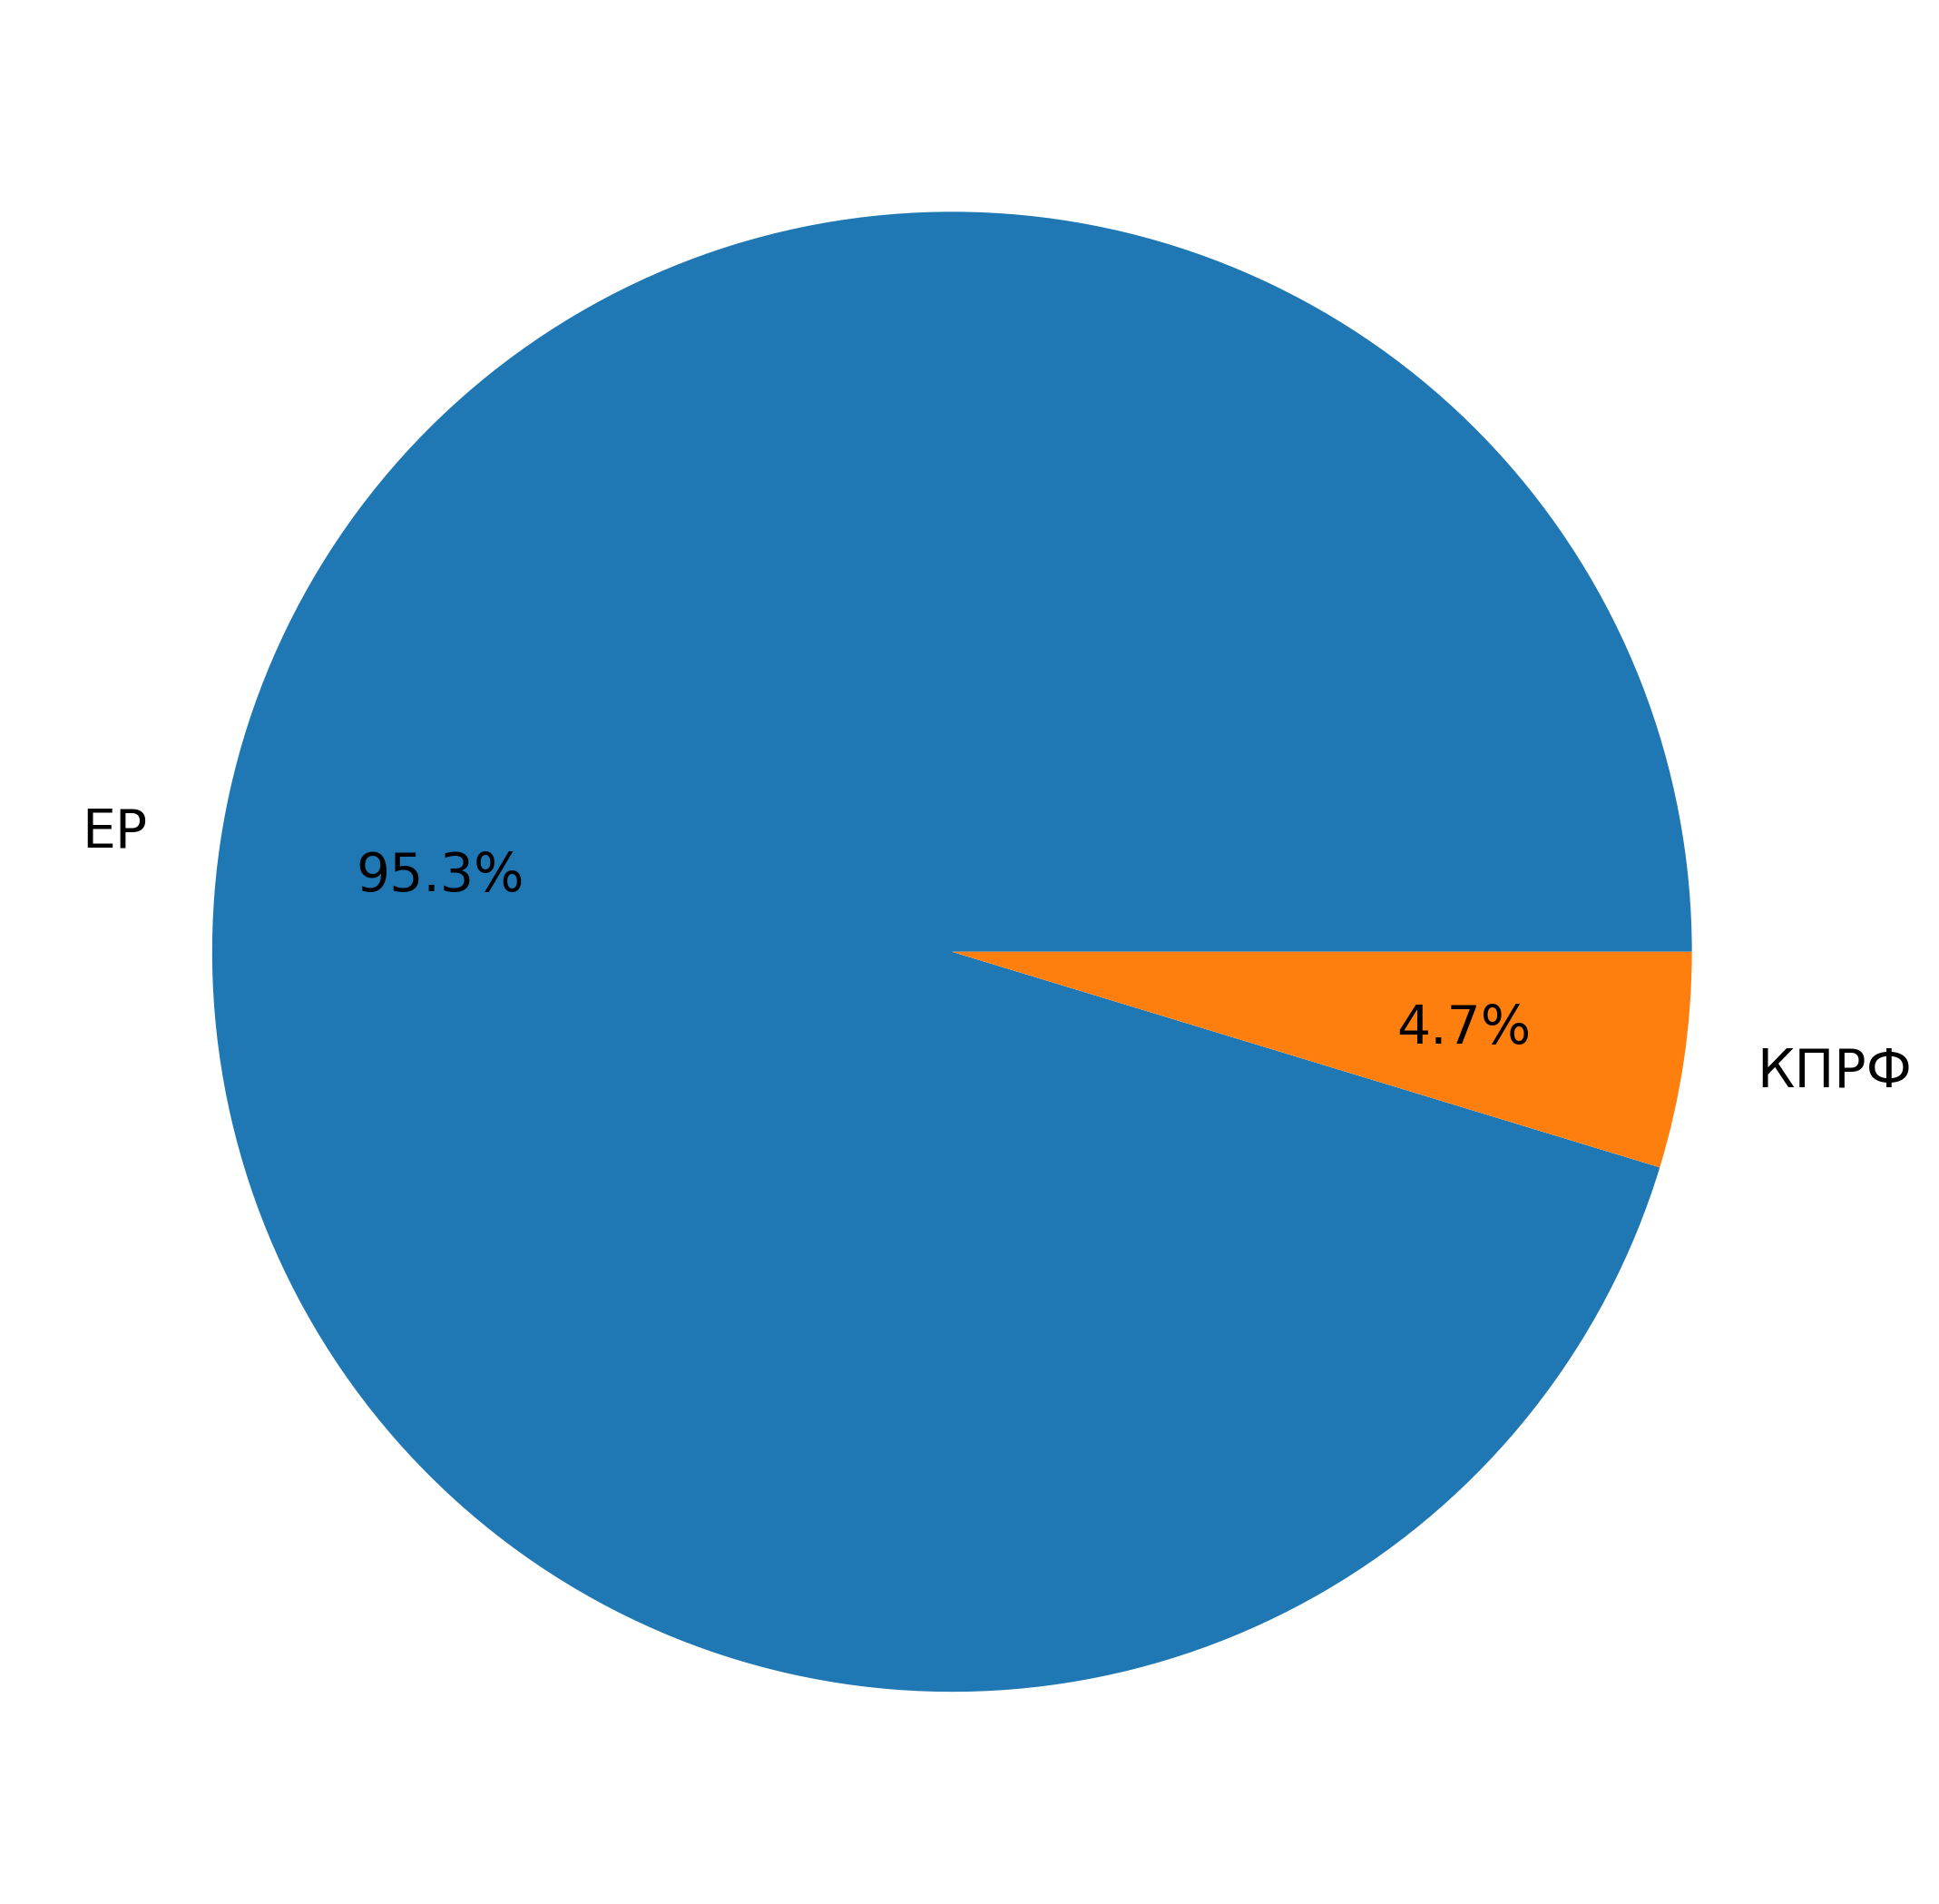

In [21]:
fig, ax = plt.subplots(figsize = (16, 9), dpi = 300)

# autopct: автоподсчет процентов и их добавление в заданном формате
# pctdistance: расстояние подписей с процентами от центра
# textprops: словарь с настройками для текста

ax.pie(vals, labels = labs, 
       autopct = '%.1f%%', 
       pctdistance = 0.7,
       textprops = dict(fontsize = 14));

Почему в `autopct` записано такое странное выражение? Это формат подписей с процентами. В Python символ `%` используется для форматирования строк (собственно, до удобных f-строк им и пользовались чаще всего). Символ `%` означает, что на это место в строке должно что-то подставляться, в данном случае – разные проценты для разных секторов. Числа, которые подставляются, могут быть в разном виде, например:

* `%i` – проценты в виде целых чисел (`i` от `integer`, Python сам округлит);
* `%.1f` – проценты в виде дробных чисел (`f` от `float`) с одним знаком после точки;
* `%.2f` – проценты в виде дробных чисел с двумя знаками после точки.

Единственное, при таком формате шаблонов строк не совсем понятно, как ставить сам символ `%`, чтобы после числа этот значок был указан. Если поставить просто `%`, Python будет понимать его как специальный символ для постановки значения. Решение простое – ставим `%%`, так уж сложилось.

Даже в таком виде диаграмма выглядит не очень. Перейдём на кольцевую диаграмму (*ring diagram* или *donut diagram*). Python не умеет строить такую диаграмму сразу, поэтому нужно построить круговую диаграмму, а затем наложить на неё белый круг подходящего радиуса:

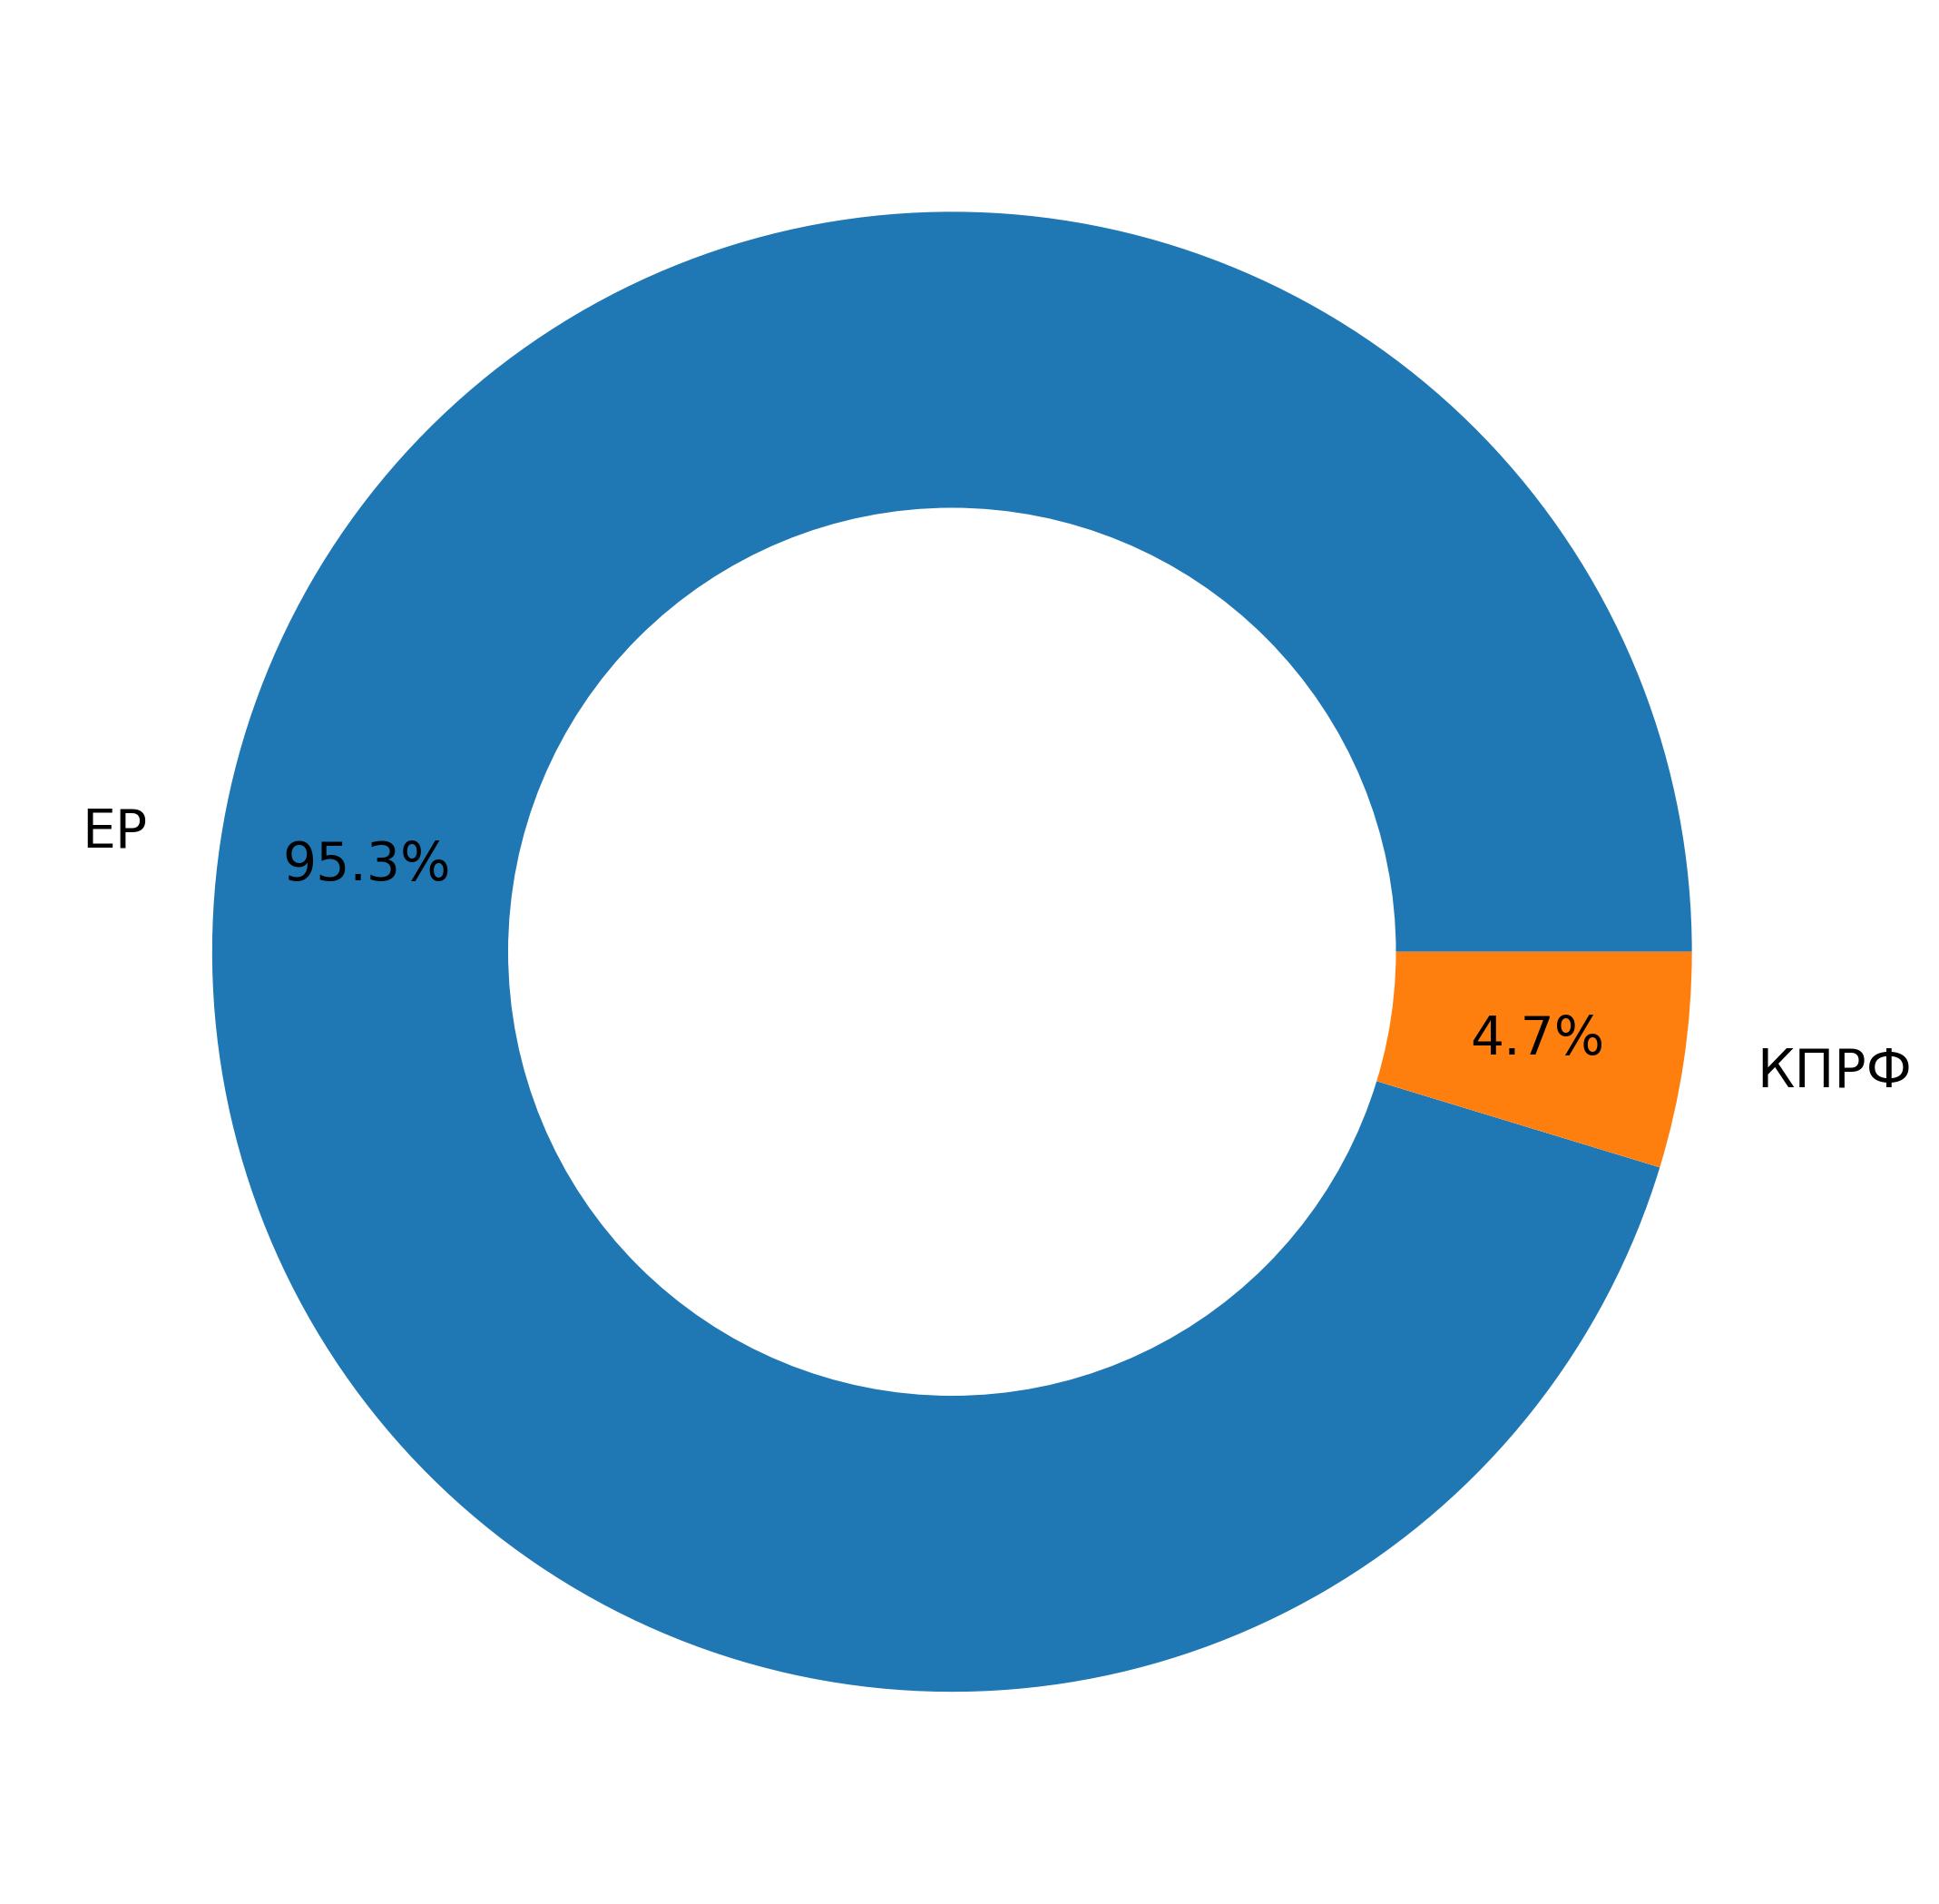

In [22]:
fig, ax = plt.subplots(figsize = (16, 9), dpi = 300)

# остается, как прежде, увеличили pctdistance
ax.pie(vals, labels = labs, 
       autopct = '%.1f%%', 
       pctdistance = 0.8,
       textprops = dict(fontsize = 14));

# создаем белый круг радиуса 0.6 с центром в нуле
centre_circle = plt.Circle((0, 0), 0.6, fc = 'white')

# добавляем круг – add_artist()
# в текущие оси графика – gca() от get current axes
fig.gca().add_artist(centre_circle);

Обычно у круговых и кольцевых диаграмм названия категорий выносят в легенду, чтобы они не «болтались» вокруг круга. Для этого нужно «разобрать» диаграмму, создаваемую через `.pie()`, на части. Теперь, когда мы добавили подписи с процентами (аргумент `autopct`), функция `.pie()` возвращает три объекта:

* набор секторов на круге (*patches* или *wedges*);
* набор подписей к секторам диаграммы (*labels*);
* набор подписей с процентами.

In [23]:
# посмотрим, как это выглядит
# wedges – сектора, они же patches
# texts – подписи, они же labels
# autotexts – подписи с процентами

wedges, texts, autotexts = ax.pie(vals, labels = labs, 
                                  autopct = '%.1f%%', 
                                  pctdistance = 0.8,
                                  textprops = dict(fontsize = 14));

print(wedges)
print(texts)
print(autotexts)

[<matplotlib.patches.Wedge object at 0x124bfa7d0>, <matplotlib.patches.Wedge object at 0x124e26b50>]
[Text(-1.0880007706360741, 0.1620318582727145, 'ЕР'), Text(1.0880007725323886, -0.16203184553946726, 'КПРФ')]
[Text(-0.7912732877353266, 0.11784135147106507, '95.3%'), Text(0.7912732891144644, -0.11784134221052163, '4.7%')]


Теперь, чтобы убрать подписи `КПРФ` и `ЕР`, нужно убрать аргумент `labels`, а подписи из `labs` перенести в метод `.legend()` для добавления легенды:

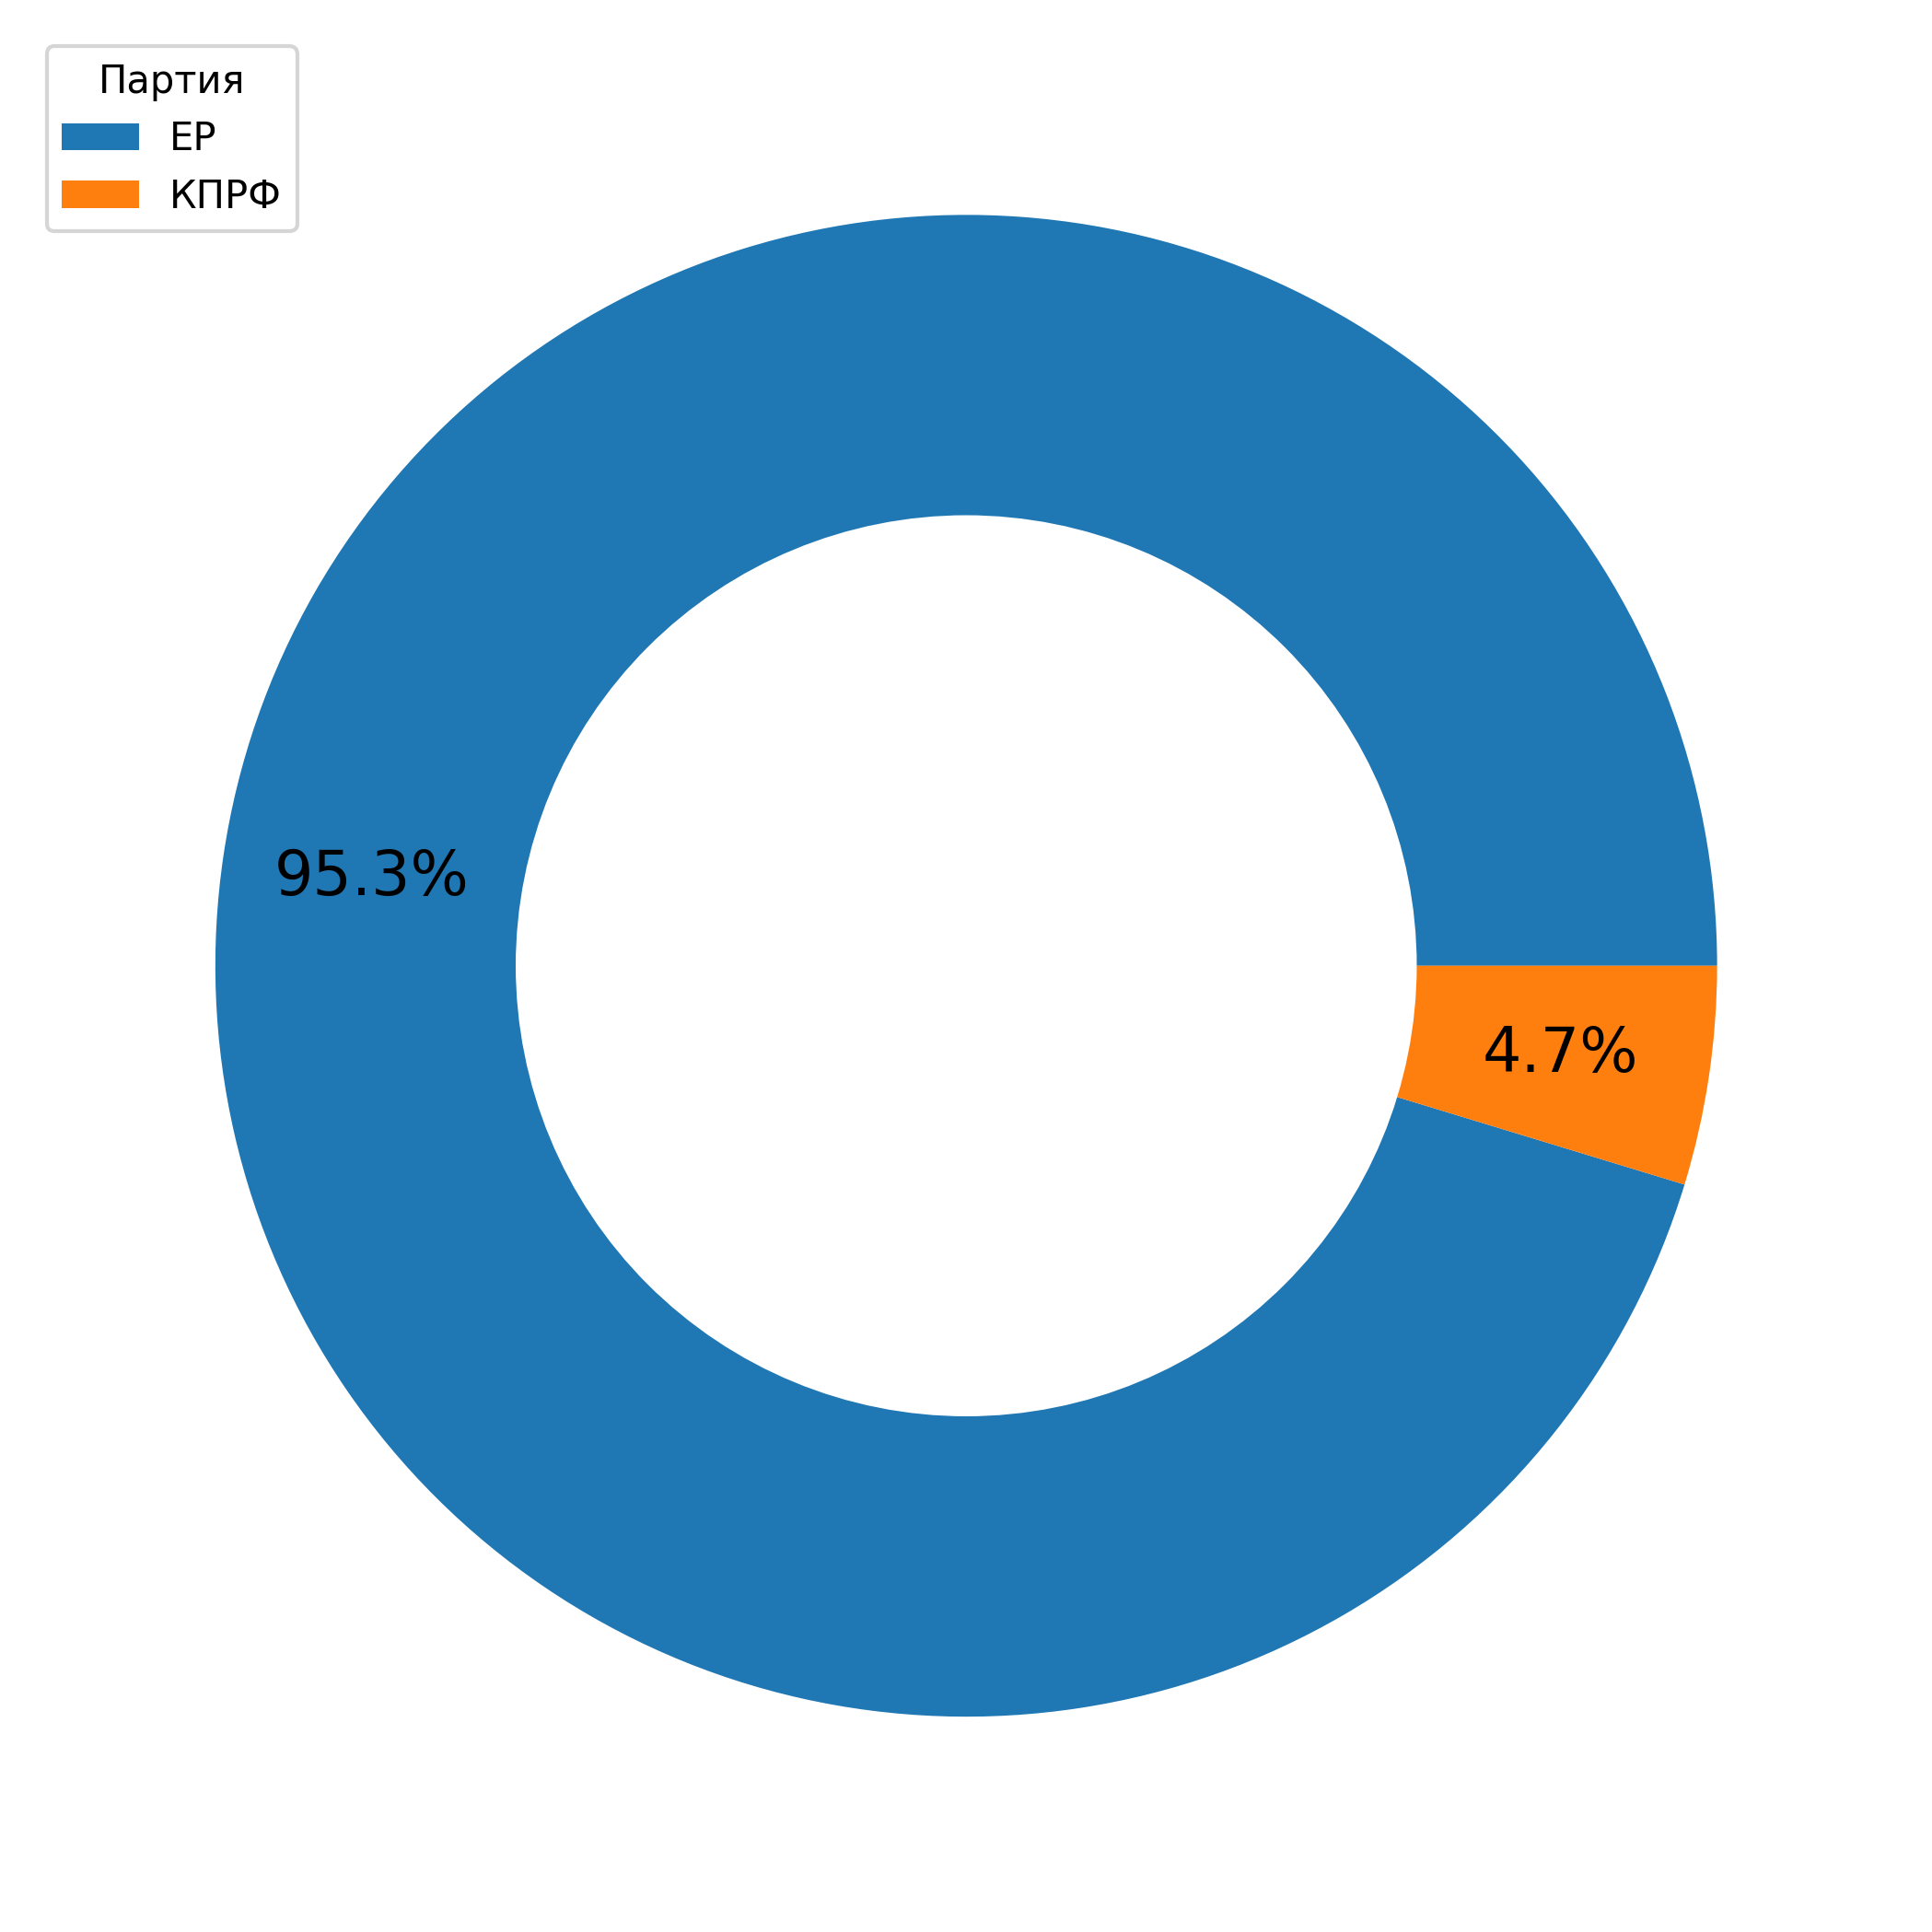

In [24]:
fig, ax = plt.subplots(figsize = (16, 9), dpi = 300)

# нет labels

wedges, texts, autotexts = ax.pie(vals, 
                                  autopct = '%.1f%%',
                                  pctdistance = 0.8, 
                                  textprops = dict(fontsize = 16));
# выносим названия в легенду
# легенда с заливкой и подписями
# фиксируем верний левый угол блока с легендой

ax.legend(wedges, labs,
          title = "Партия",
          loc = "upper left")

# все тот же код для белого круга
centre_circle = plt.Circle((0, 0), 0.6, fc = 'white')
fig.gca().add_artist(centre_circle);

Почему в коде выше в `.legend()` были вписаны `wedges` и `labs`? Легенда обычно содержит пары соответствий: цвет заливки и название, цвет линии и название, тип точки (точка, звездочка, квадратик) и название. Здесь нам нужно забрать цвета заливки, а сделать это можно, обратившись к секторам диаграммы, они же `wedges` в нашем коде.

Изменим цвета диаграммы – в метод `.pie()` в аргумент `colors` можно добавить список своих цветов.

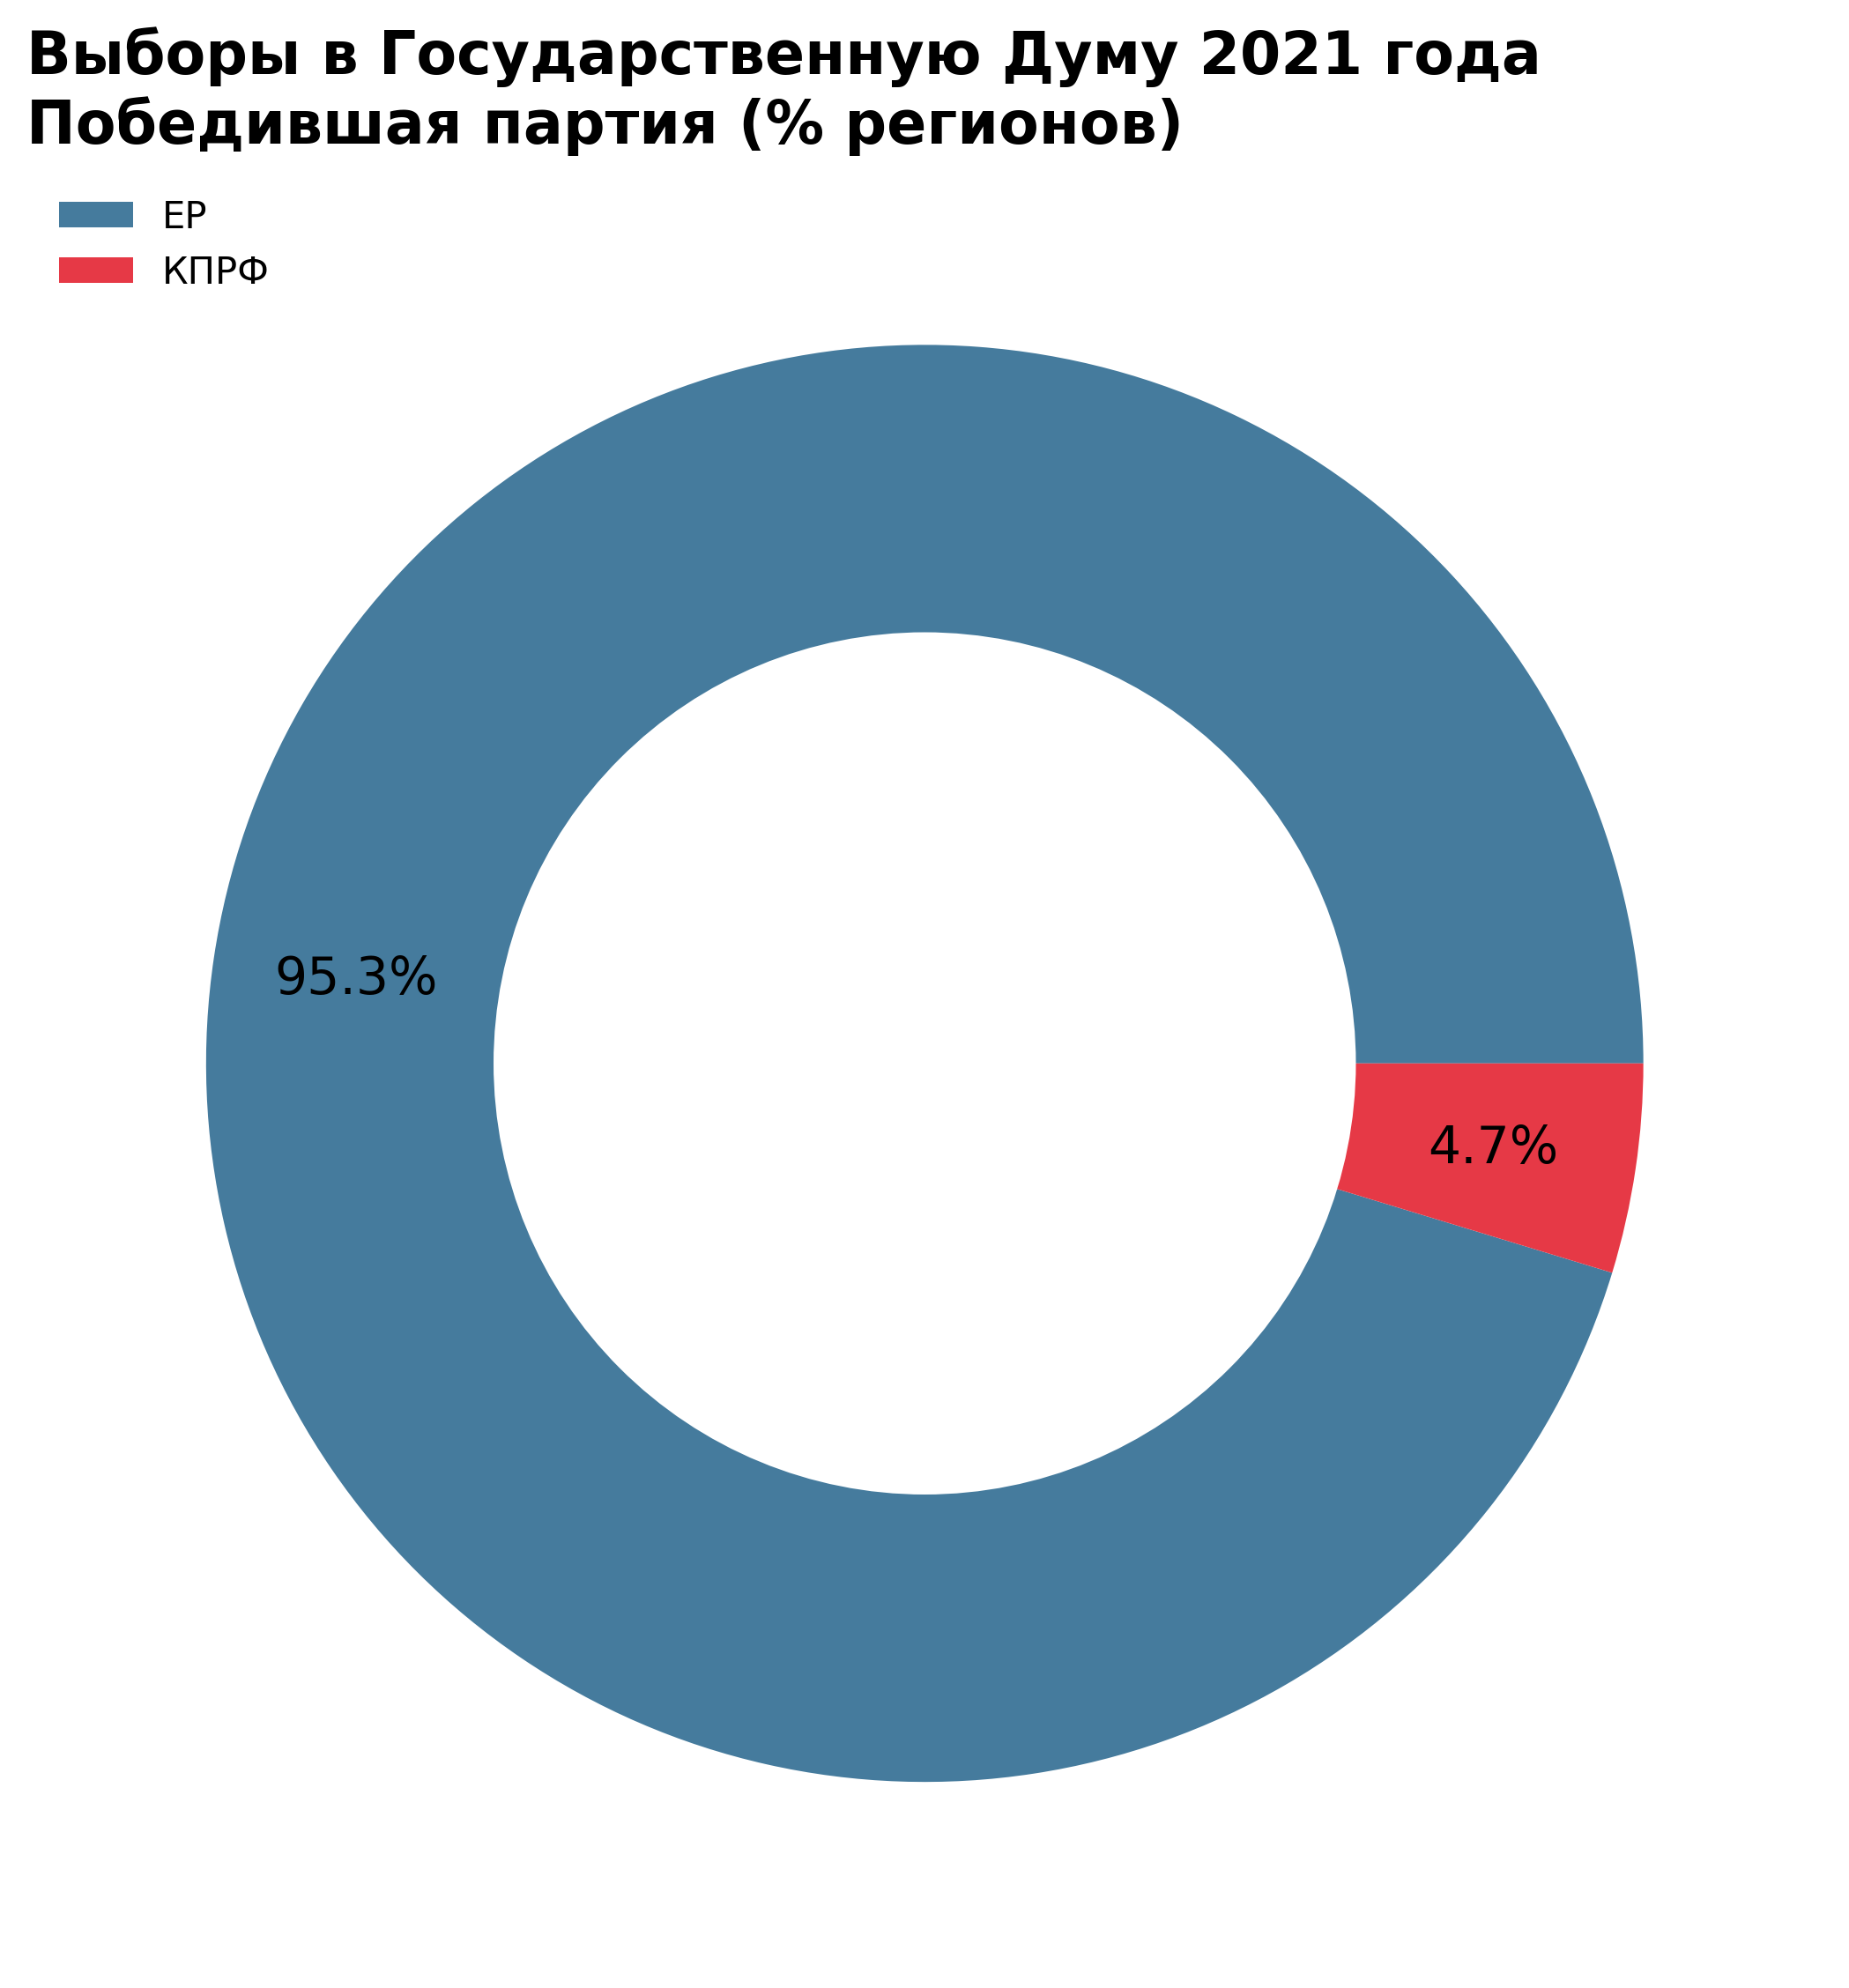

In [25]:
# добавляем свои цвета, исправляем легенду
# палитры https://coolors.co/

cols = ["#457b9d", "#e63946"]

fig, ax = plt.subplots(figsize = (16, 9), dpi = 300)

# colors = cols

wedges, texts, autotexts = ax.pie(vals, 
                                  colors = cols,
                                  autopct = "%.1f%%",
                                  pctdistance = 0.8,
                                  textprops = dict(fontsize = 14));

# выключаем рамку у легенды
# frameon = False

ax.legend(wedges, labs,
          loc = "upper left",
          frameon = False);

# добавляем заголовок графика
# так он длинный, разбиваем его на две строки через \n
# шрифт 16 пт, полужирный

ax.set_title("Выборы в Государственную Думу 2021 года\nПобедившая партия (% регионов)", 
            fontsize = 16, 
            loc = "left", 
            fontweight = "bold");

# все тот же код для белого круга
centre_circle = plt.Circle((0, 0), 0.6, fc = "white")
fig.gca().add_artist(centre_circle);

В примерах выше мы везде применяли методы к осям графика `ax`. Однако на выходе нам нужны не сами оси, а материальная картинка, изображение, которое можно экспортировать в файл. А это – объект `fig`. Выберем его и сохраним в файл `my_pie.png`:

In [26]:
fig.savefig("my_pie.png")

Этот файл появится в рабочей папке – там, где сейчас находится текущий ipynb-файл. Но, разумеется, можно прописать путь к новому изображению полностью, тогда файл будет сохранен там, где захотим:

    fig.savefig("/Users/allat/Desktop/my_pie.png")

### Дополнительно 1

Так как довольно часто названия категорий в таблице частот нас могут не устраивать (например, названия в файле на английском, а подписи в диаграмме на русском, названия сокращенные, а мы хотим полные, в названиях нет заглавных букв, а они нам нужны), в легенду можно добавлять не исходные названия из датафрейма, а значения из нового списка. Так, в примере выше можно вместо `labs` внутри `.legend()` зафиксировать список полных названий партий:

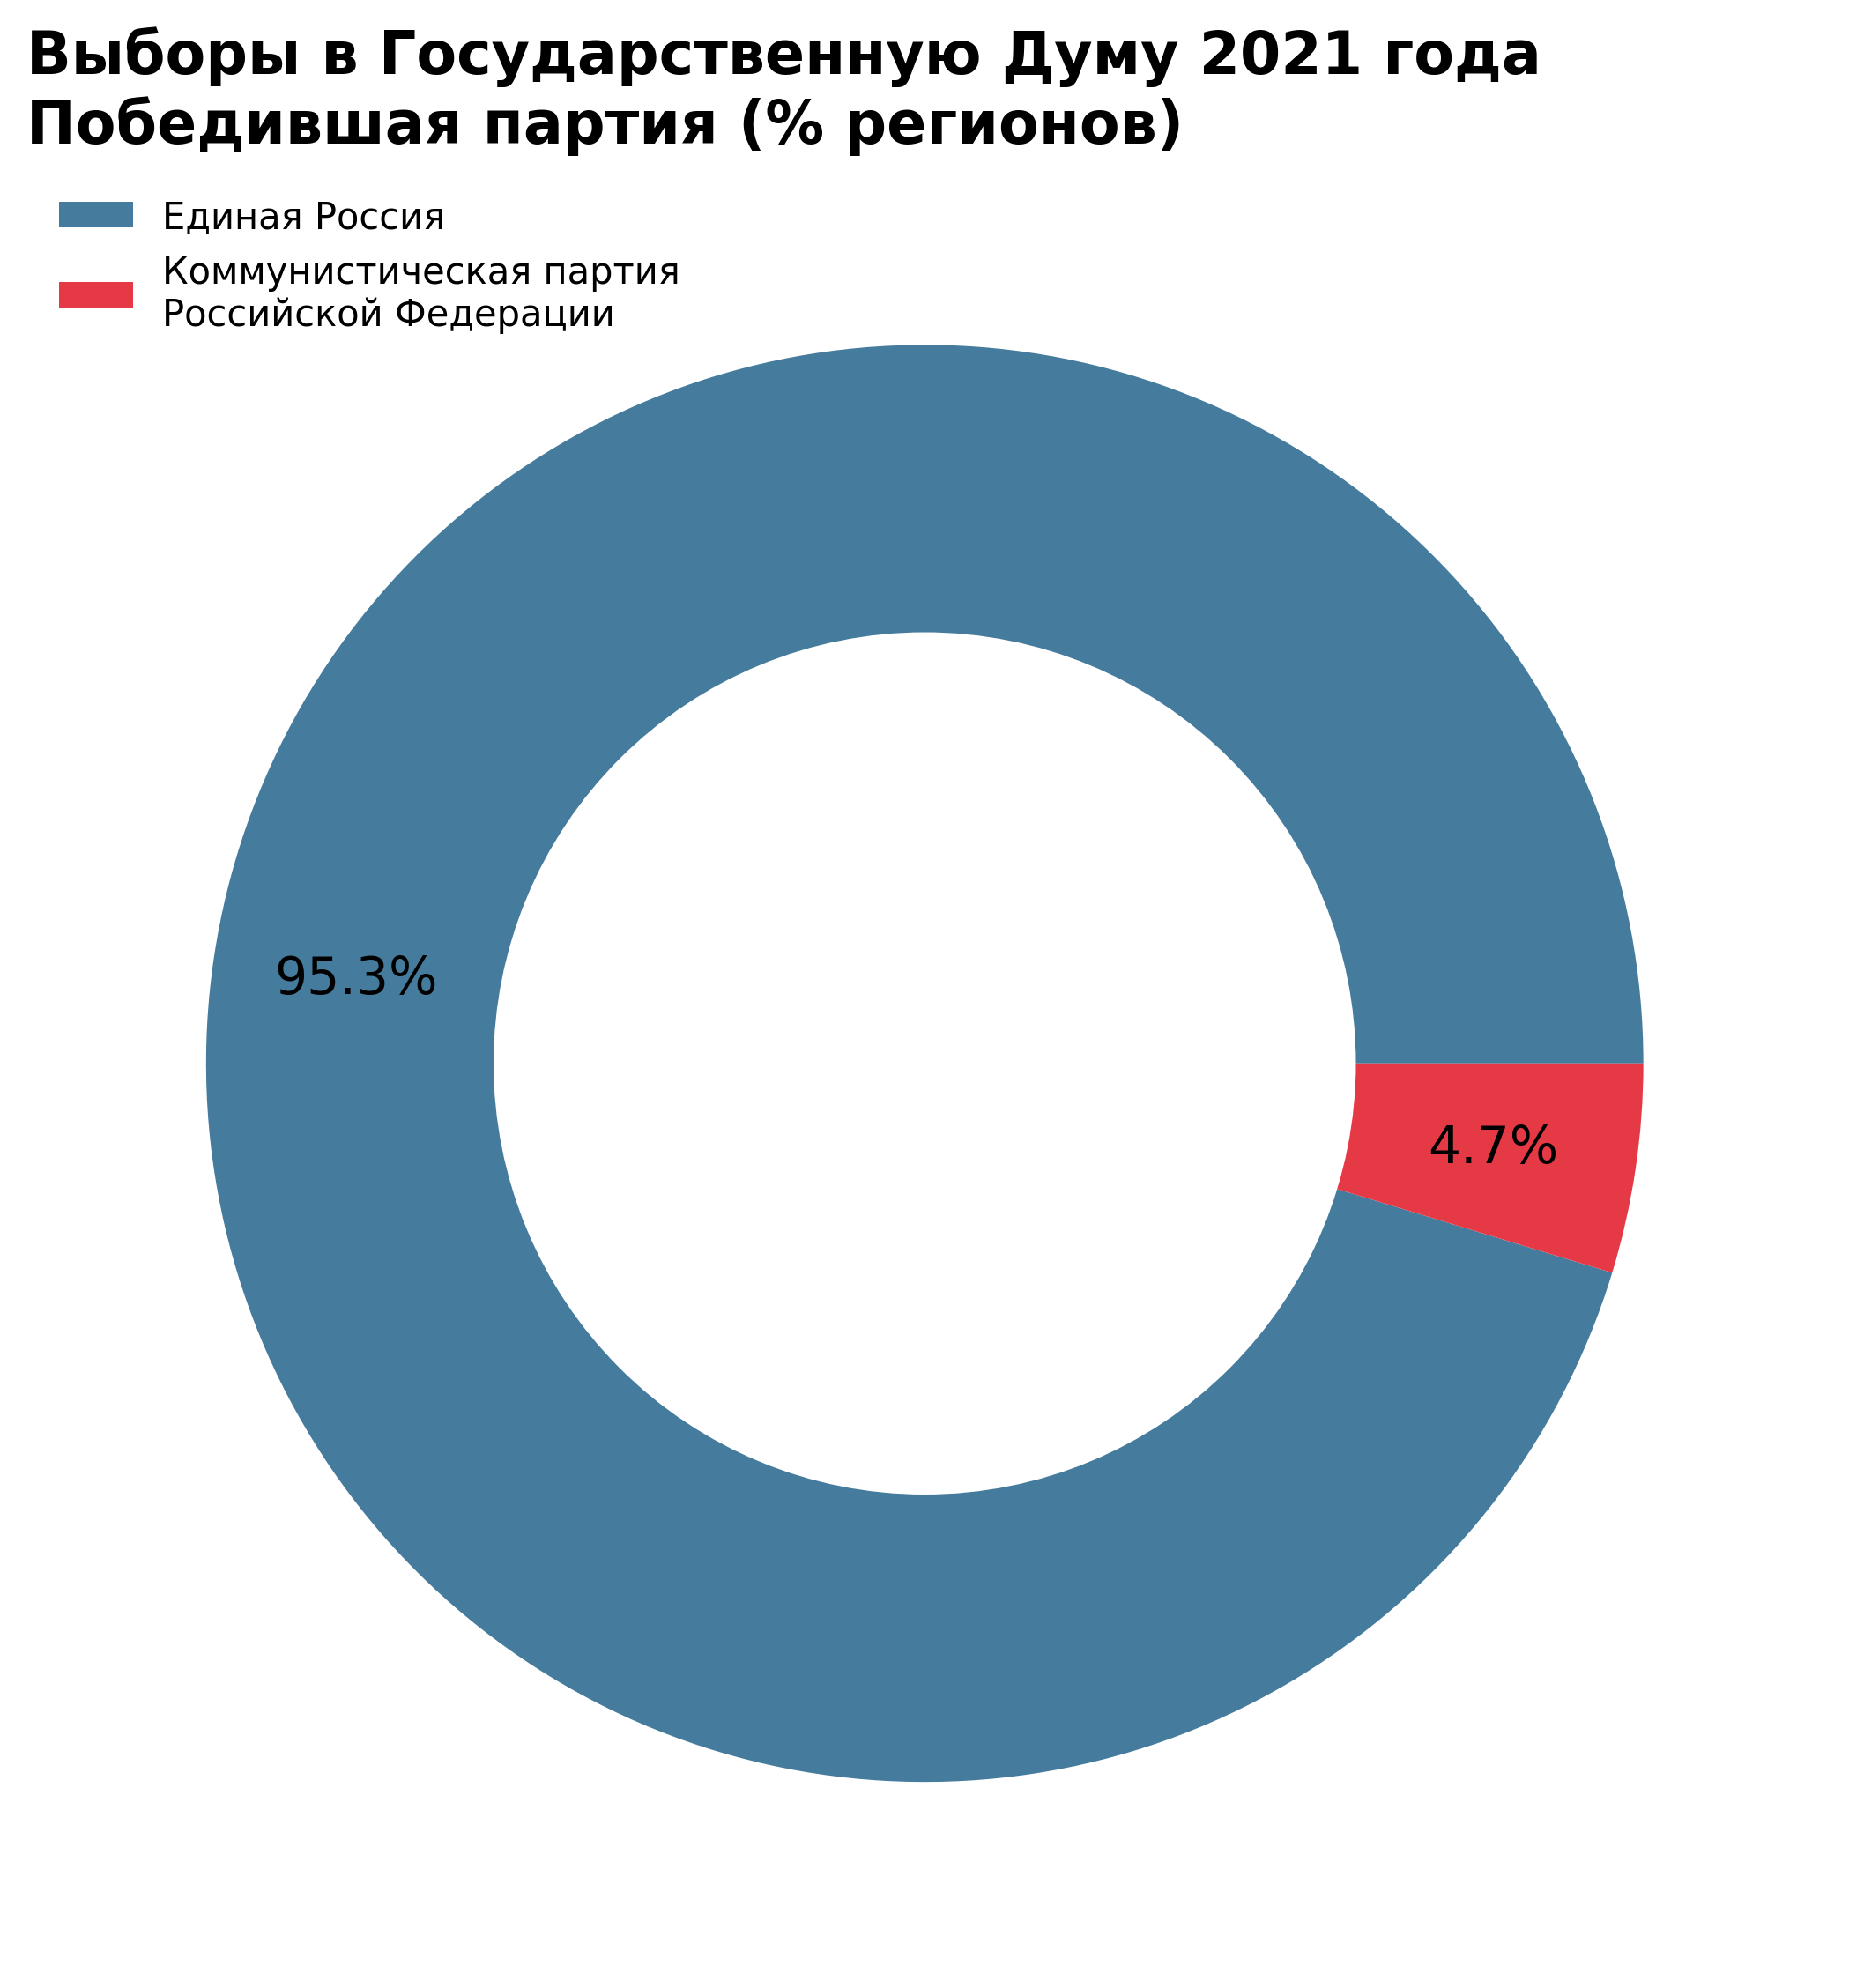

In [27]:
cols = ["#457b9d", "#e63946"]
new_labs = ["Единая Россия", 
            "Коммунистическая партия\nРоссийской Федерации"]

fig, ax = plt.subplots(figsize = (16, 9), dpi = 300)
wedges, texts, autotexts = ax.pie(vals, 
                                  colors = cols,
                                  autopct = "%.1f%%",
                                  pctdistance = 0.8,
                                  textprops = dict(fontsize = 14));

# изменения только тут – новый список выше
ax.legend(wedges, 
          new_labs, 
          loc = "upper left", 
          frameon = False);

ax.set_title("Выборы в Государственную Думу 2021 года\nПобедившая партия (% регионов)", 
            fontsize = 16, 
            loc = "left", 
            fontweight = "bold");

centre_circle = plt.Circle((0, 0), 0.6, fc = "white")
fig.gca().add_artist(centre_circle);

### Дополнительно 2

Часто при создании таких диаграмм (и круговых, и кольцевых) подписи с процентами «теряются» из-за того, что текст по умолчанию черного цвета. Если для секторов диаграммы выбрать цвета заливки потемнее, то цвет подписей легко можно изменить на белый, добавив название цвета в `textprops` внутри `.pie()`:

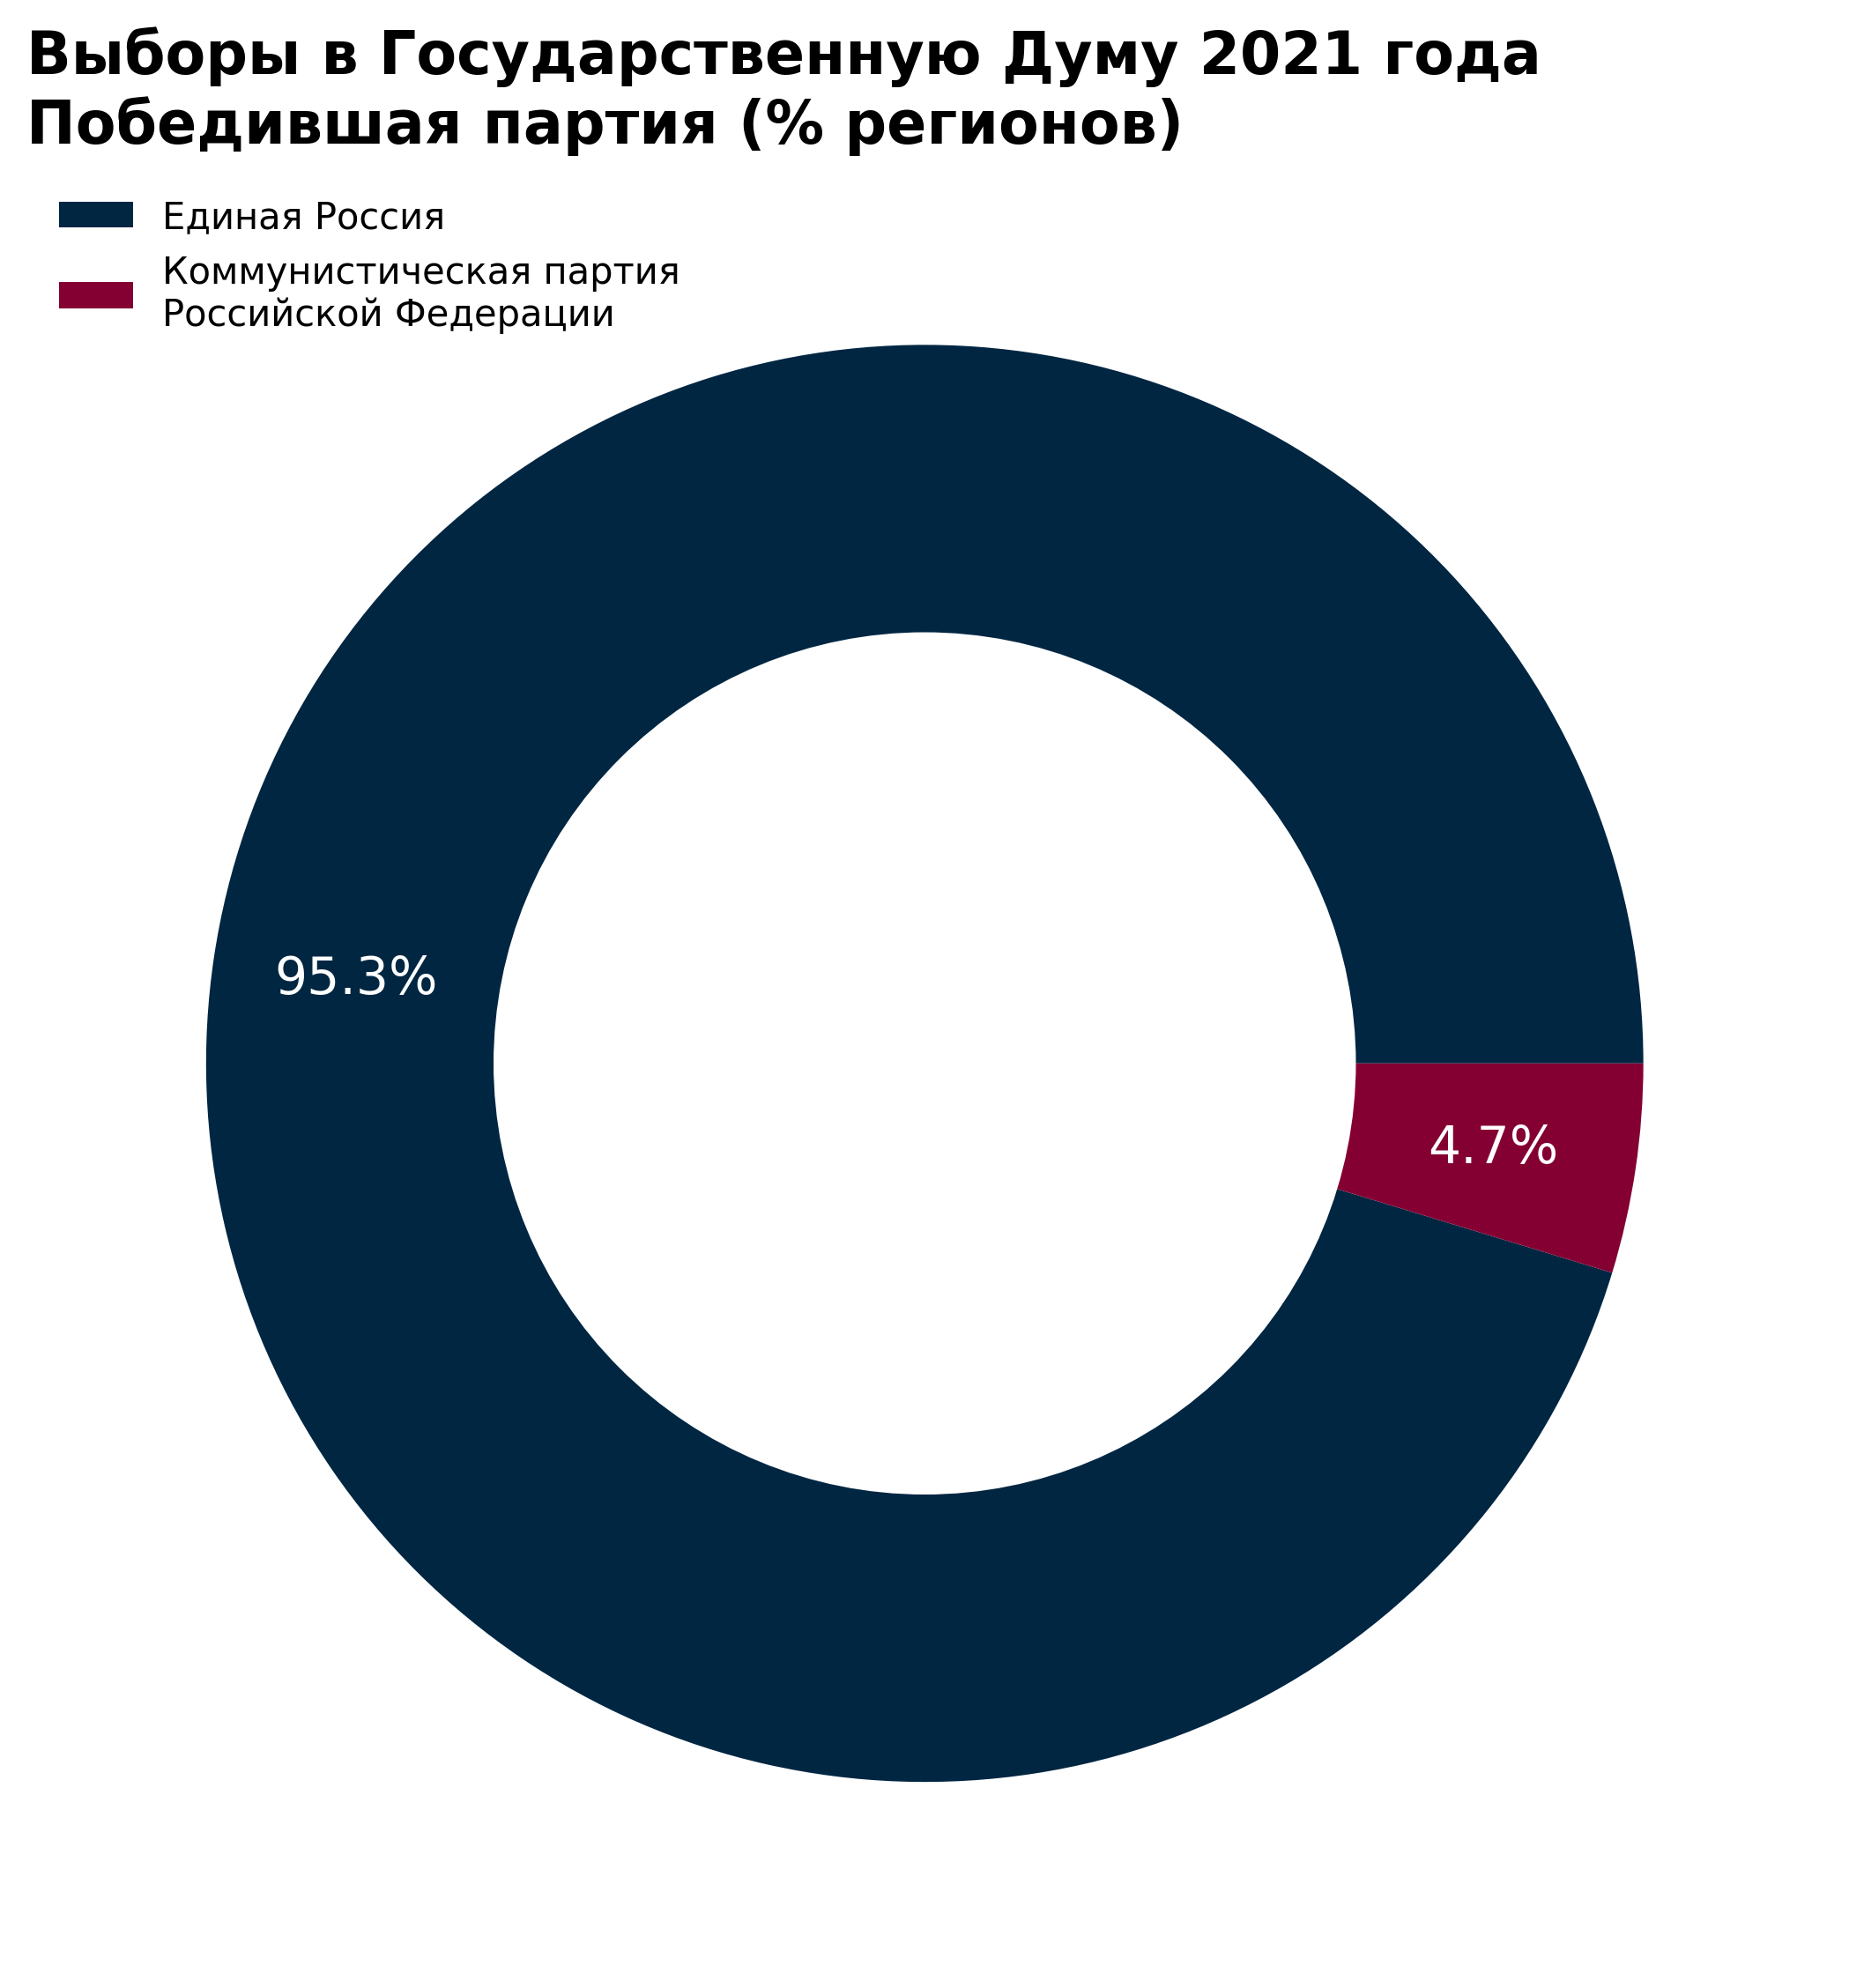

In [28]:
# цвета темнее
cols = ["#002642", "#840032"]
new_labs = ["Единая Россия", 
            "Коммунистическая партия\nРоссийской Федерации"]

# color = "white"
fig, ax = plt.subplots(figsize = (16, 9), dpi = 300)
wedges, texts, autotexts = ax.pie(vals, 
                                  colors = cols,
                                  autopct = "%.1f%%",
                                  pctdistance = 0.8,
                                  textprops = dict(fontsize = 14, 
                                                   color = "white"));
ax.legend(wedges, 
          new_labs, 
          loc = "upper left", 
          frameon = False);

ax.set_title("Выборы в Государственную Думу 2021 года\nПобедившая партия (% регионов)", 
            fontsize = 16, 
            loc = "left", 
            fontweight = "bold");

centre_circle = plt.Circle((0, 0), 0.6, fc = "white")
fig.gca().add_artist(centre_circle);

Однако этот способ не является универсальным. Настройки в аргументе `textprops` влияют на *все* текстовые подписи на графике. То есть, если бы легенды у графика не было (вариант графика, с которого мы начинали), и подписи с процентами, и подписи с названиями секторов (партий) были бы белого цвета.

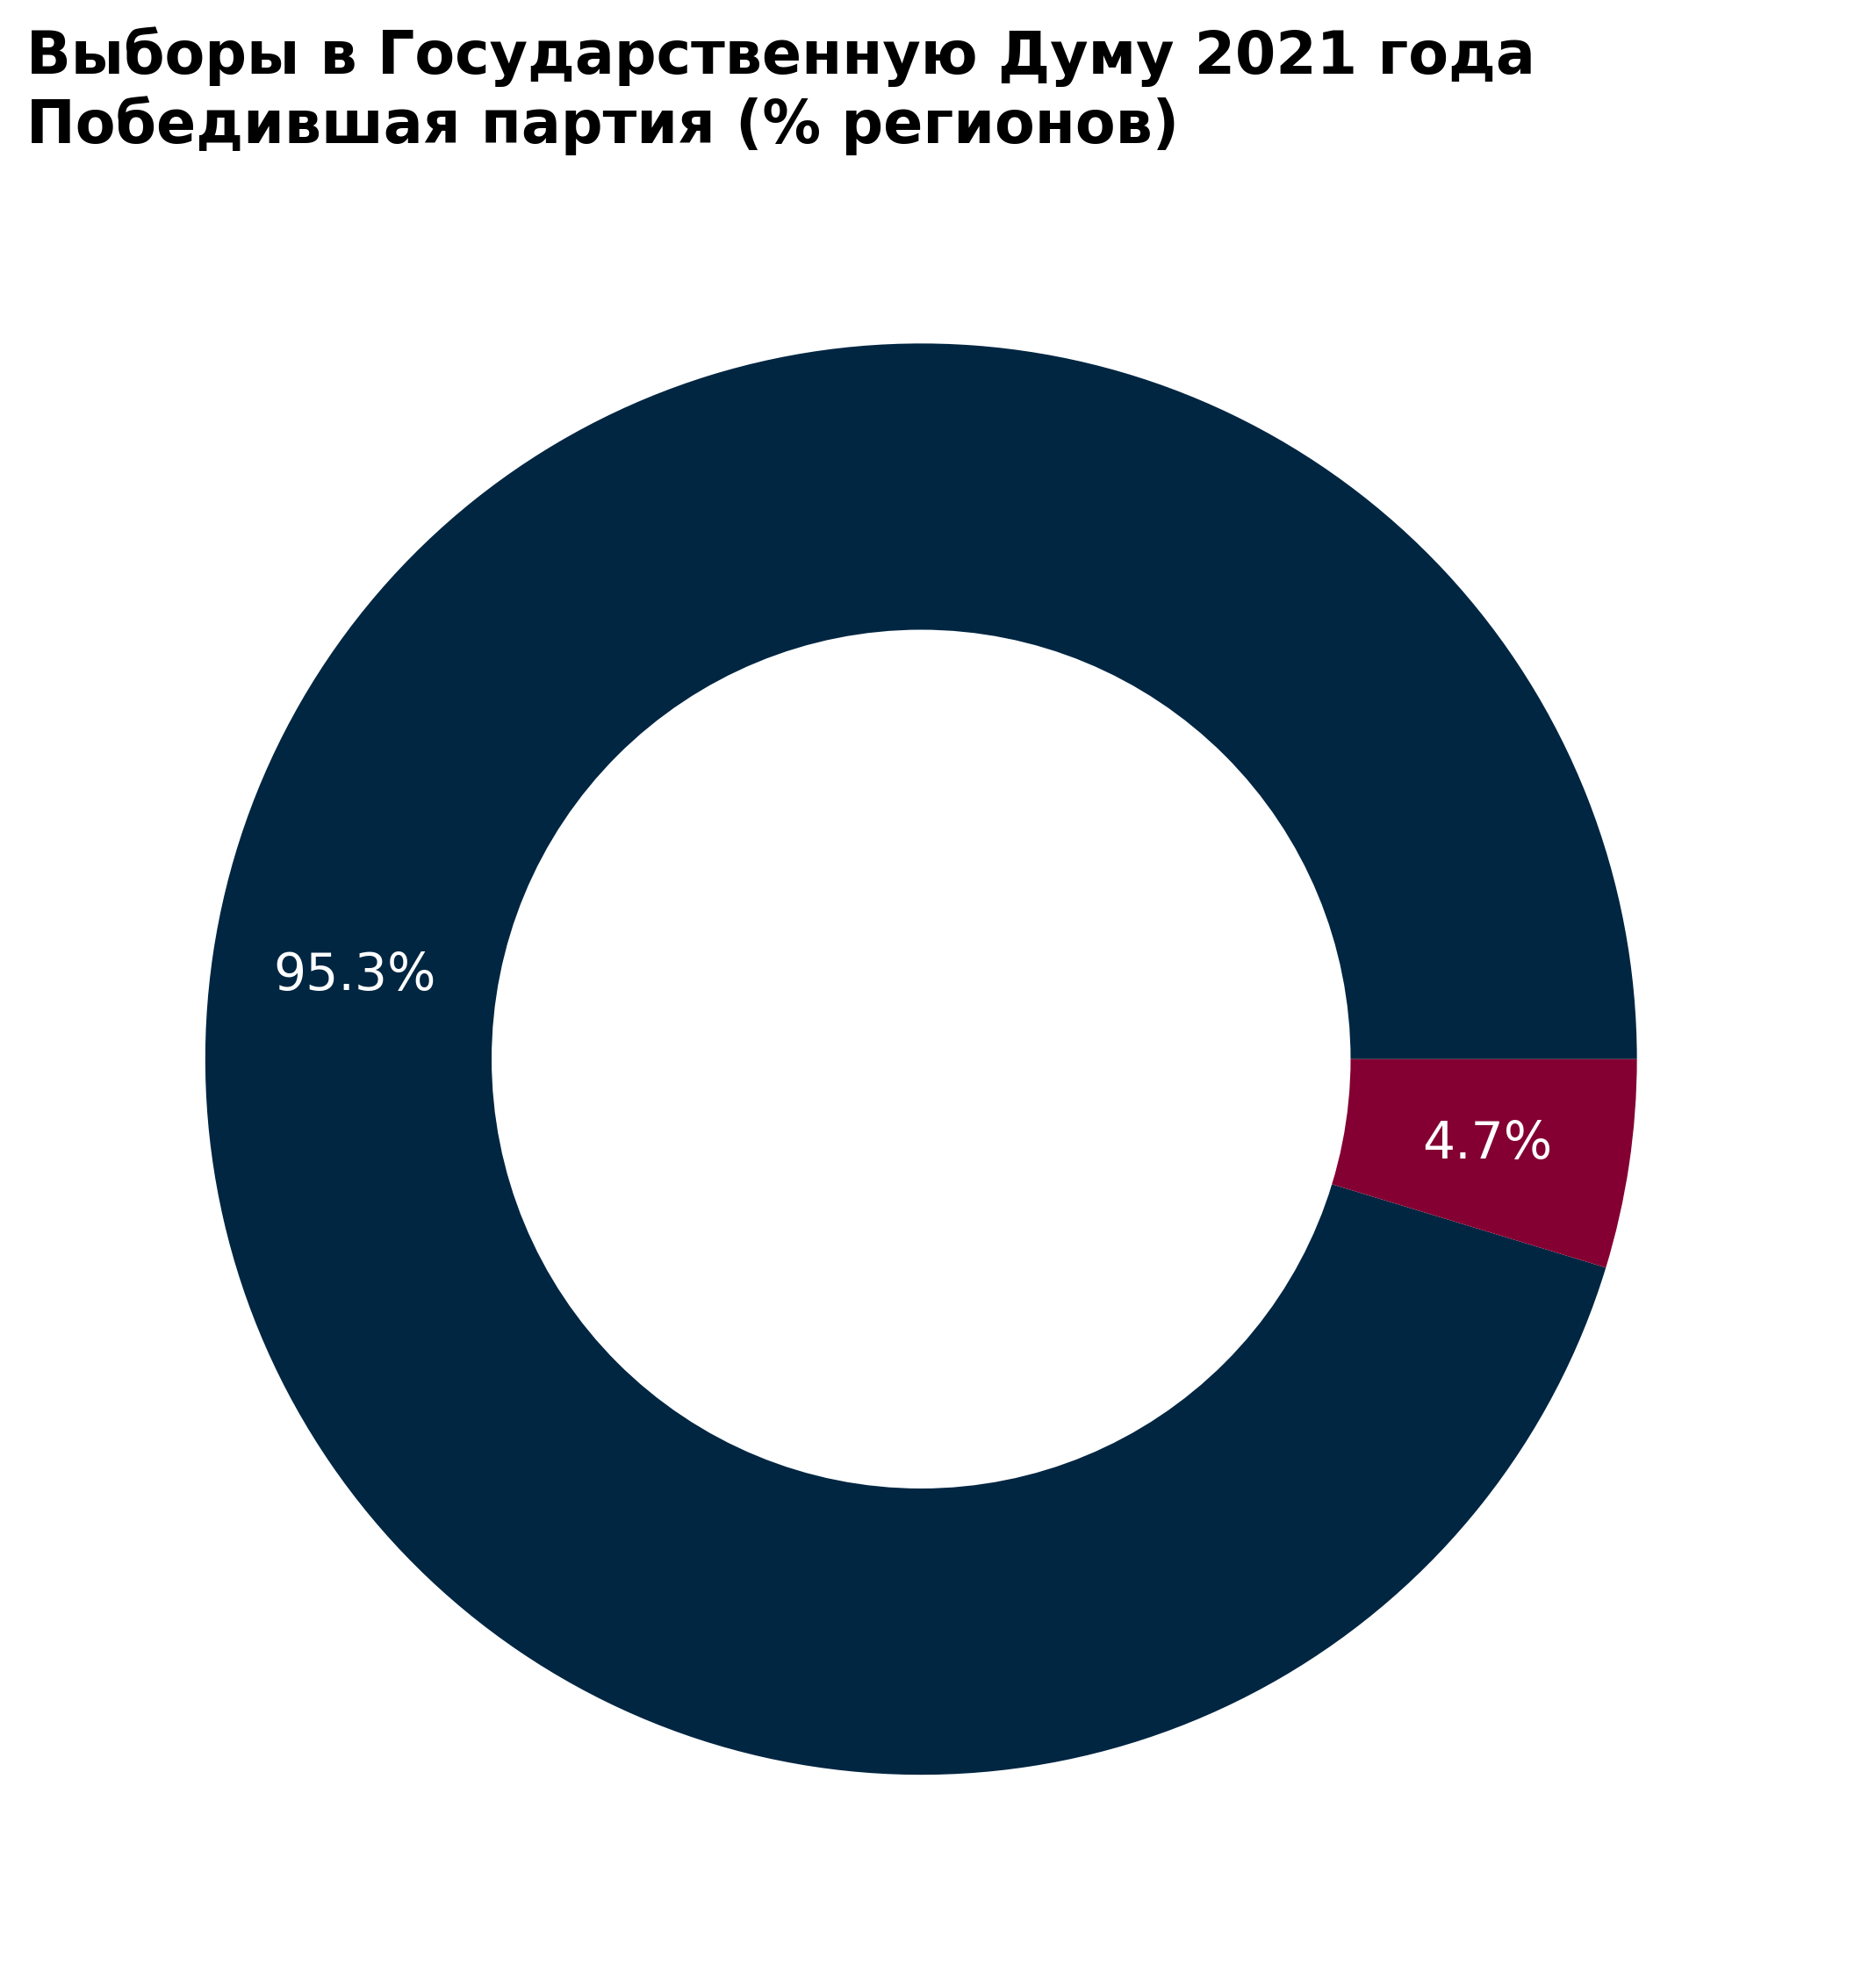

In [29]:
cols = ["#002642", "#840032"]

fig, ax = plt.subplots(figsize = (16, 9), dpi = 300)

# вернули labels = labs
# а кода с legend() уже нет
wedges, texts, autotexts = ax.pie(vals, 
                                  labels = labs,
                                  colors = cols,
                                  autopct = "%.1f%%",
                                  pctdistance = 0.8,
                                  textprops = dict(fontsize = 14, 
                                                   color = "white"));

ax.set_title("Выборы в Государственную Думу 2021 года\nПобедившая партия (% регионов)", 
            fontsize = 16, 
            loc = "left", 
            fontweight = "bold");

centre_circle = plt.Circle((0, 0), 0.6, fc = "white")
fig.gca().add_artist(centre_circle);

Видите ли на графике выше названия партий? Нет. А они есть, просто белые. Чтобы убедиться, изменим в `textprops` цвет на зеленый:

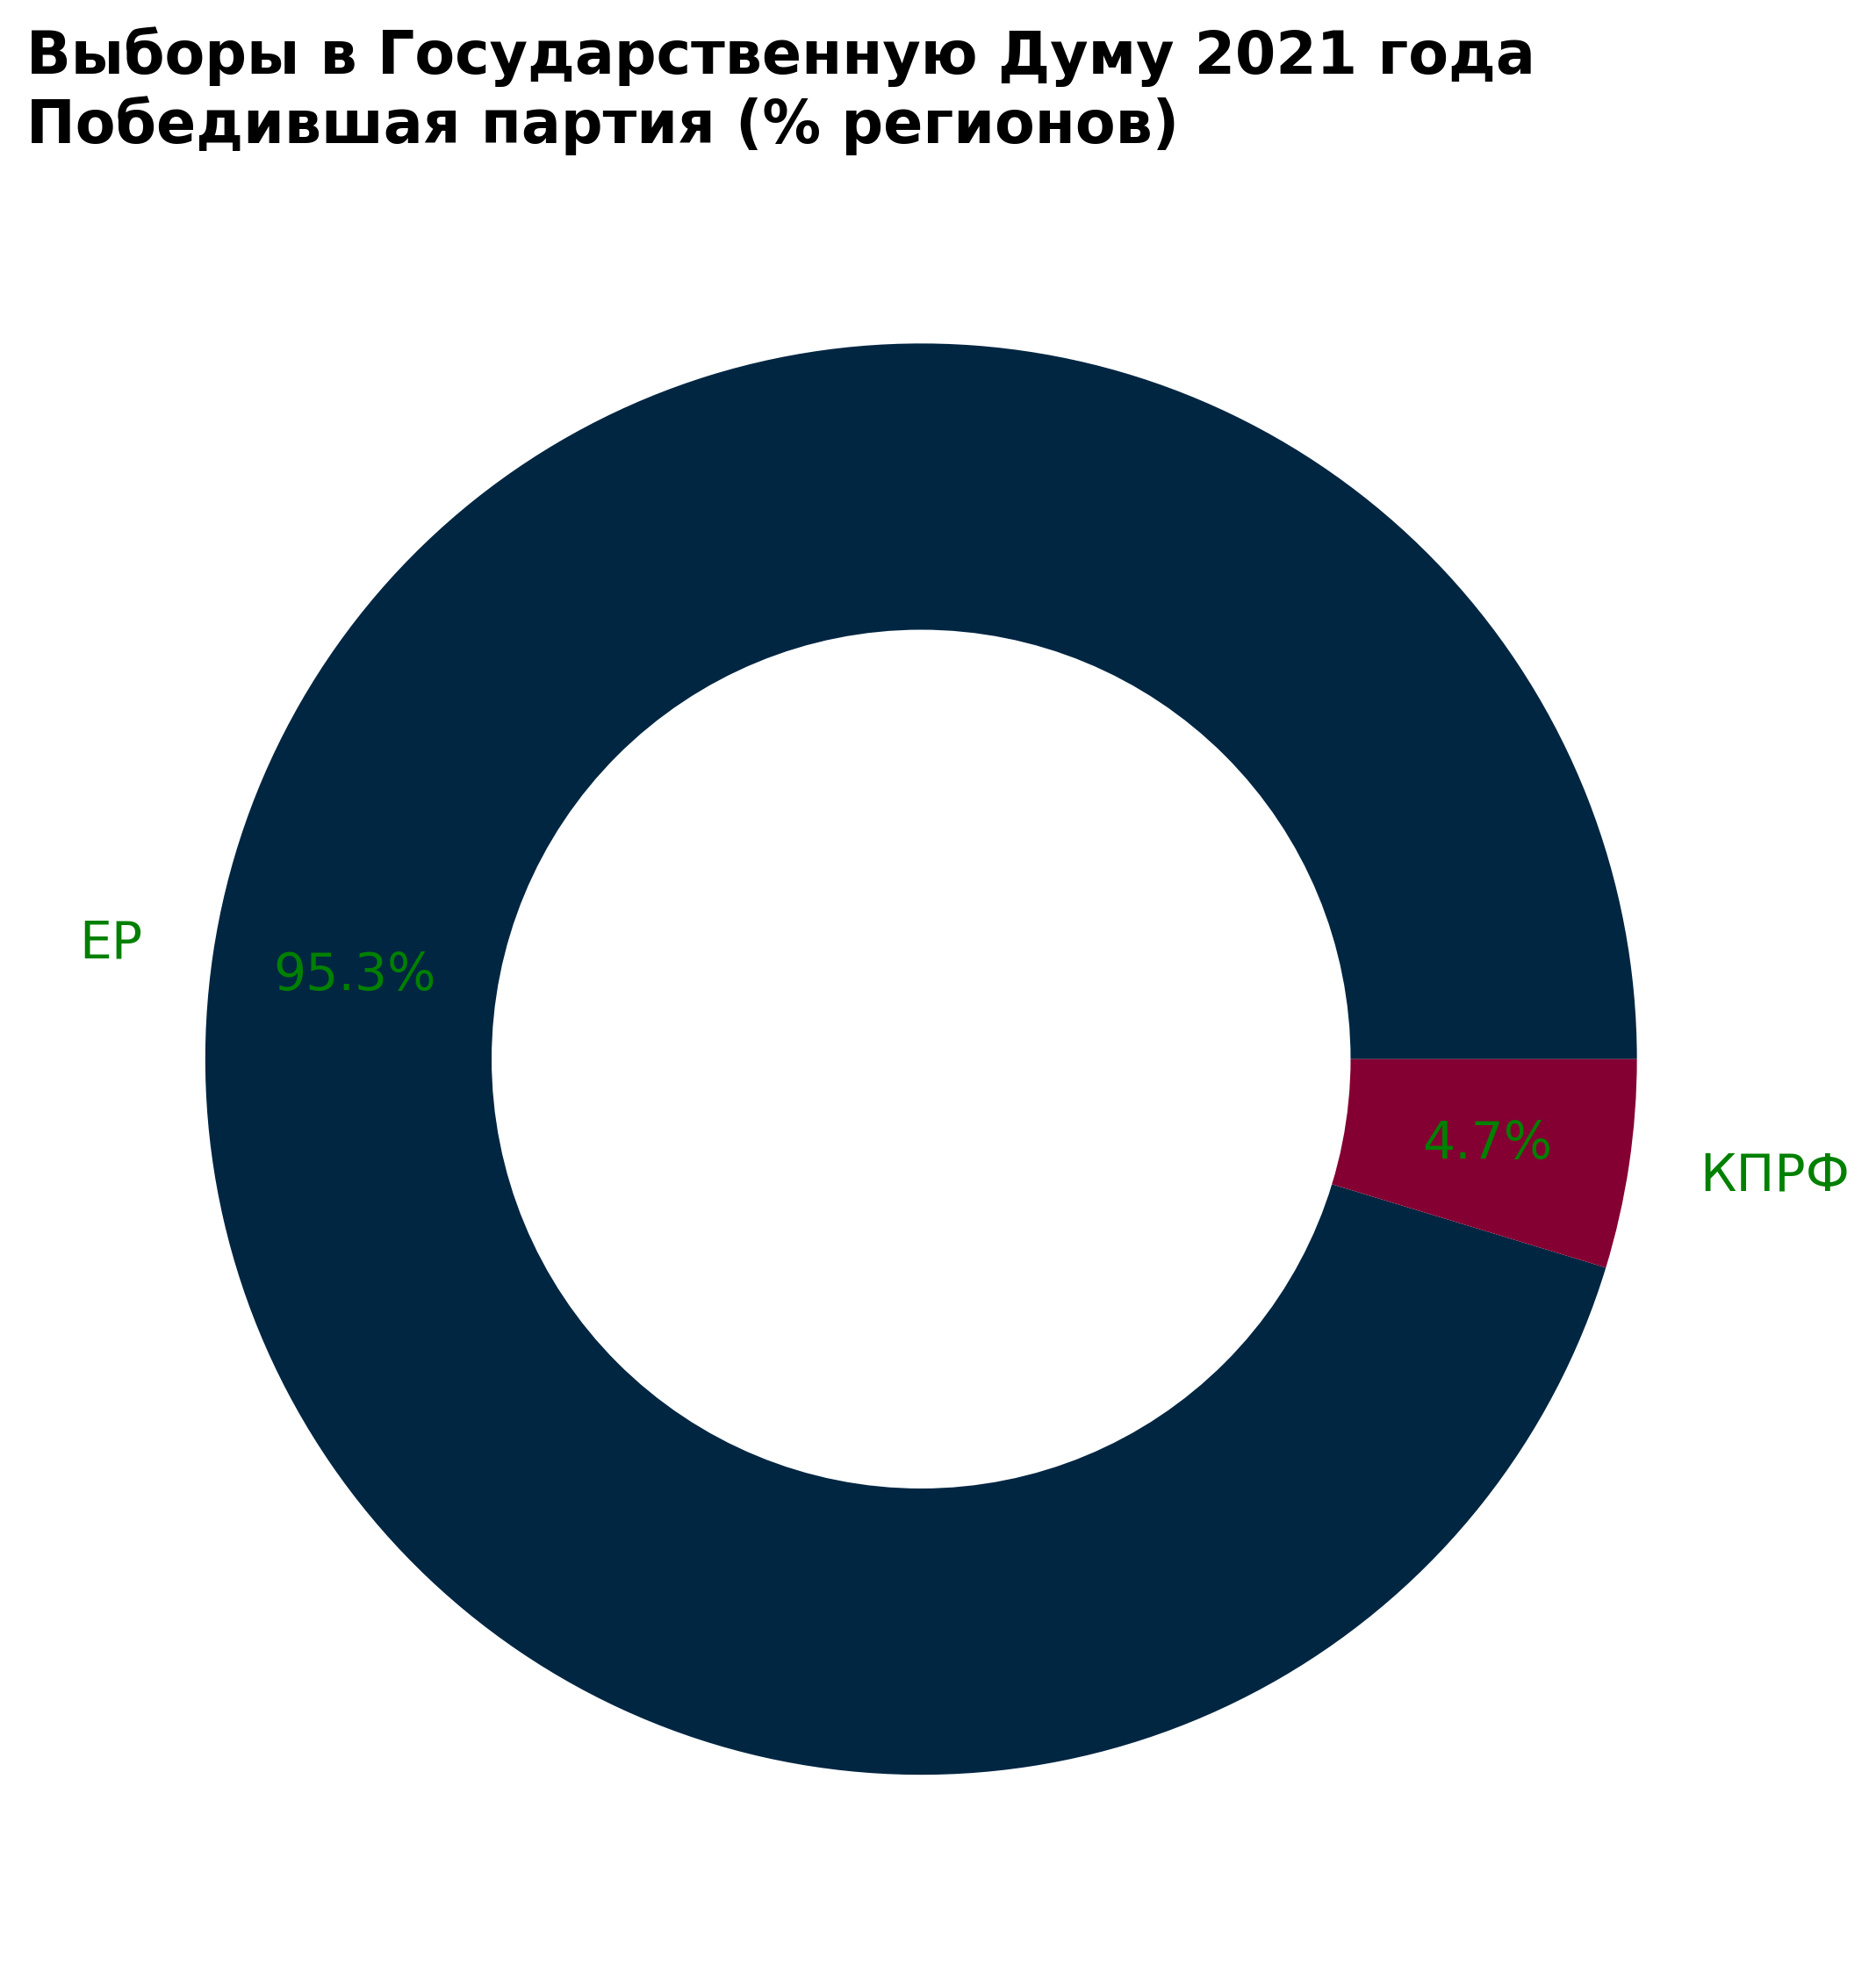

In [30]:
cols = ["#002642", "#840032"]

fig, ax = plt.subplots(figsize = (16, 9), dpi = 300)

# color = "green"
wedges, texts, autotexts = ax.pie(vals, 
                                  labels = labs,
                                  colors = cols,
                                  autopct = "%.1f%%",
                                  pctdistance = 0.8,
                                  textprops = dict(fontsize = 14, 
                                                   color = "green"));

ax.set_title("Выборы в Государственную Думу 2021 года\nПобедившая партия (% регионов)", 
            fontsize = 16, 
            loc = "left", 
            fontweight = "bold");

centre_circle = plt.Circle((0, 0), 0.6, fc = "white")
fig.gca().add_artist(centre_circle);

Некрасиво, но наглядно. Вывод: если все-таки не хочется добавлять легенду, цвета для подписей с процентами и цвета для подписей с названиями (ровно как и размер/тип шрифта) придется настраивать отдельно. Звучит страшно, но на самом деле, все довольно просто.

Так как в коде выше мы уже разобрали диаграмму на части (`wedges`, `texts`, `autotexts`), по каждому такому набору элементов можно запустить цикл и через метод `.set_color()` установить нужный цвет:

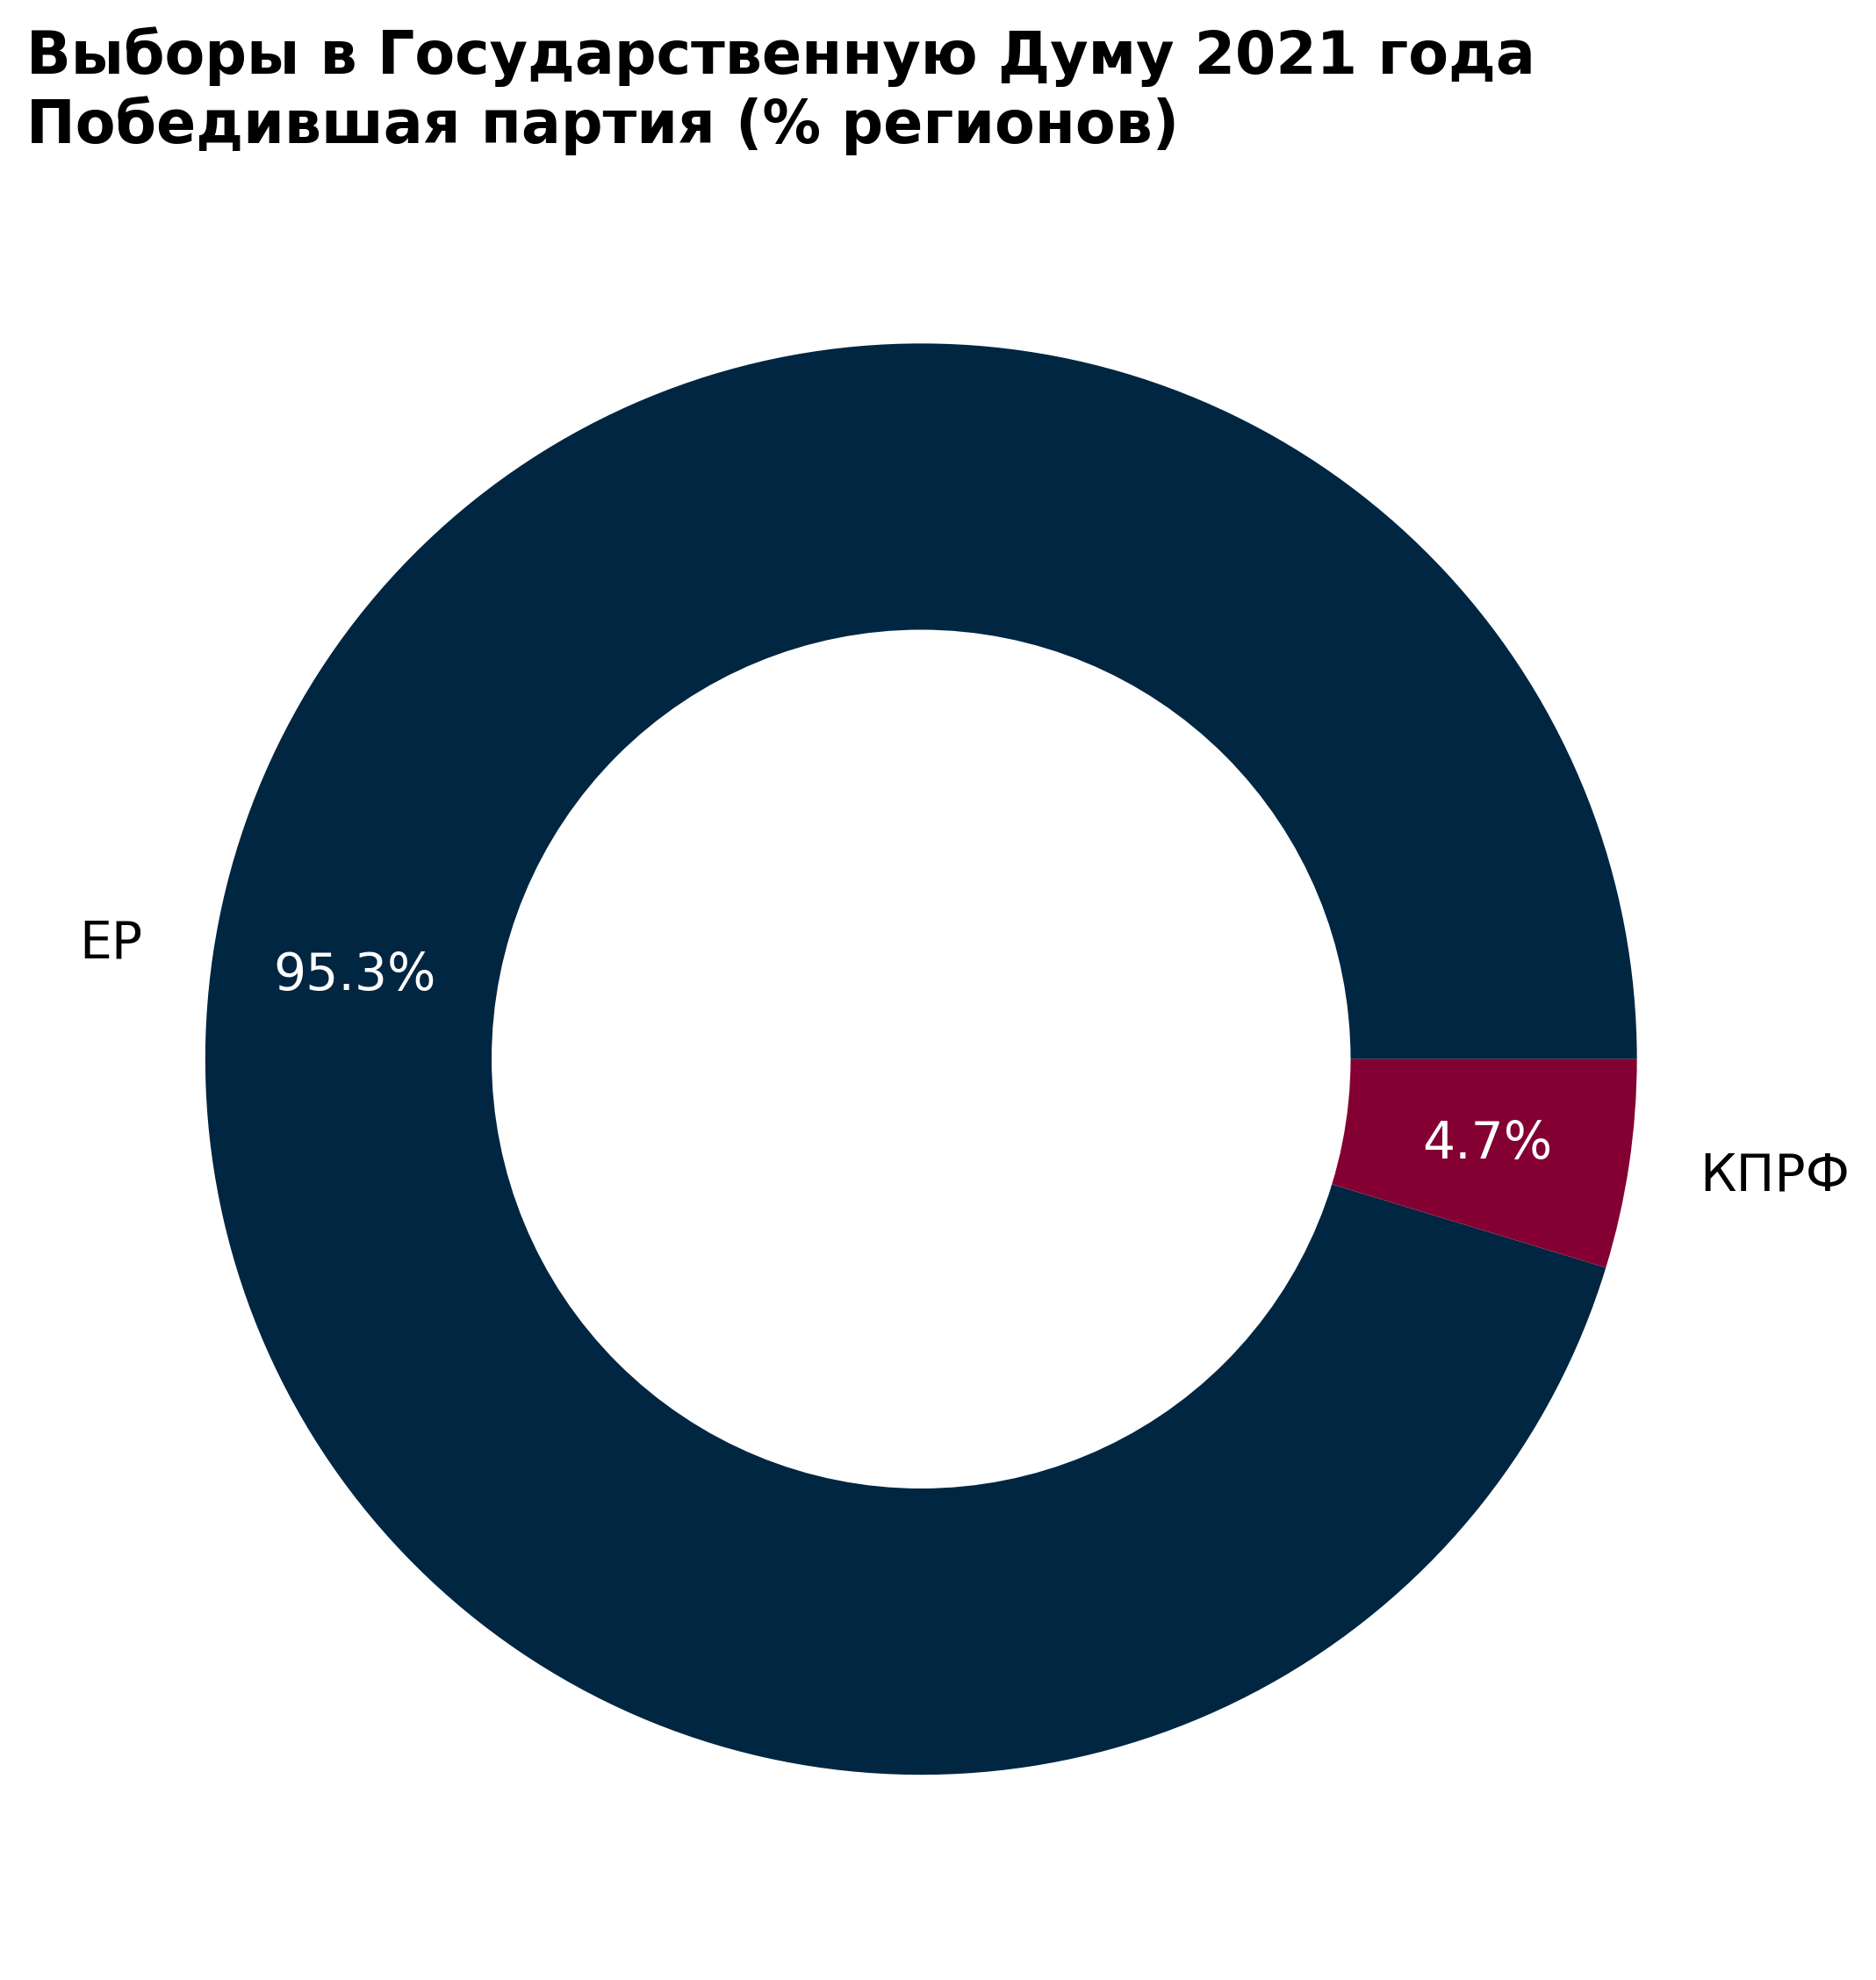

In [31]:
cols = ["#002642", "#840032"]

fig, ax = plt.subplots(figsize = (16, 9), dpi = 300)

# тут нет color в textprops, 
# цвет названий партий будет черным по умолчанию
wedges, texts, autotexts = ax.pie(vals, 
                                  labels = labs,
                                  colors = cols,
                                  autopct = "%.1f%%",
                                  pctdistance = 0.8,
                                  textprops = dict(fontsize = 14));

# а вот тут в цикле за каждой подписью с %
# устанавливаем белый цвет

for autotext in autotexts:
    autotext.set_color("white")

ax.set_title("Выборы в Государственную Думу 2021 года\nПобедившая партия (% регионов)", 
            fontsize = 16, 
            loc = "left", 
            fontweight = "bold");

centre_circle = plt.Circle((0, 0), 0.6, fc = "white")
fig.gca().add_artist(centre_circle);

### Дополнительно 3* (это уже высший пилотаж)

Остается два законных вопроса (если мы все-таки не хотим добавлять легенду):

* Как сделать подписи секторов того же цвета, что и сектор?
* Как сделать подписи с процентами светлыми на темном фоне и темными – на светлом?

Первый вопрос попроще – на объектах типа `patches` (`patches.Wedge` – частный случай, `Wedge` – это сектор круга, а `patches` – это просто графические объекты с заливкой, это могут быть и столбцы-прямоугольники типа `patches.Rectangle` в столбиковой диаграмме) определен метод `.get_facecolor()`, который позволяет забрать цвет заливки:

In [32]:
wedges, texts, autotexts = ax.pie(vals, 
                                  labels = labs,
                                  colors = cols,
                                  autopct = "%.1f%%",
                                  pctdistance = 0.8,
                                  textprops = dict(fontsize = 14));

for w in wedges:
    print(w.get_facecolor())

(0.0, 0.14901960784313725, 0.25882352941176473, 1.0)
(0.5176470588235295, 0.0, 0.19607843137254902, 1.0)


В выдаче выше представлены два цвета, только не в формате HEX (с `#`), и даже не в формате RGB (тройка целых чисел, интенсивность красного-зеленого-синего), а в нормализованном формате RGBA. Выглядит непонятно, но нам помогут два факта: 

* формат RGBA – это RGB + A, код цвета плюс его непрозрачность Alpha;
* нормализация здесь – деление на 255, на максимальное возможное значение для каждого цвета в RGB.

Получается, когда мы добавили темно-синий цвет с кодом `#002642` для первого сектора, `matplotlib`:

* перевел его в формат RGB  – это `rgb(0, 38, 66)`, можно проверить в [конвертере](https://www.w3schools.com/colors/colors_converter.asp);
* поделил все элементы в `rgb(0, 38, 66)` на 255;
* добавил значение 1.0, так как прозрачность мы не добавляли (непрозрачность 100%).

То же было выполнено и для второго цвета, поэтому цвета у нас заданы в виде набора дробных чисел.

Можно воспользоваться этим методом и в цвета `texts` подставлять значения из `.get_facecolor()`. Но для этого в цикле нужно перебирать пары *сектор-подпись*. Создадим набор таких пар через функцию `zip()` и посмотрим, что получится:

In [33]:
wedges, texts, autotexts = ax.pie(vals, 
                                  labels = labs,
                                  colors = cols,
                                  autopct = "%.1f%%",
                                  pctdistance = 0.8,
                                  textprops = dict(fontsize = 14));
# w – сектор
# t – подпись

for w, t in zip(wedges, texts):
    print(t, w.get_facecolor())

Text(-1.0880007706360741, 0.1620318582727145, 'ЕР') (0.0, 0.14901960784313725, 0.25882352941176473, 1.0)
Text(1.0880007725323886, -0.16203184553946726, 'КПРФ') (0.5176470588235295, 0.0, 0.19607843137254902, 1.0)


В выдаче выше мы видим объекты типа `Text` (подпись с координатами на графике) и через пробел цвет сектора. Убираем `print()` и помещаем цвет `w.get_facecolor()` в `t.set_color()`:

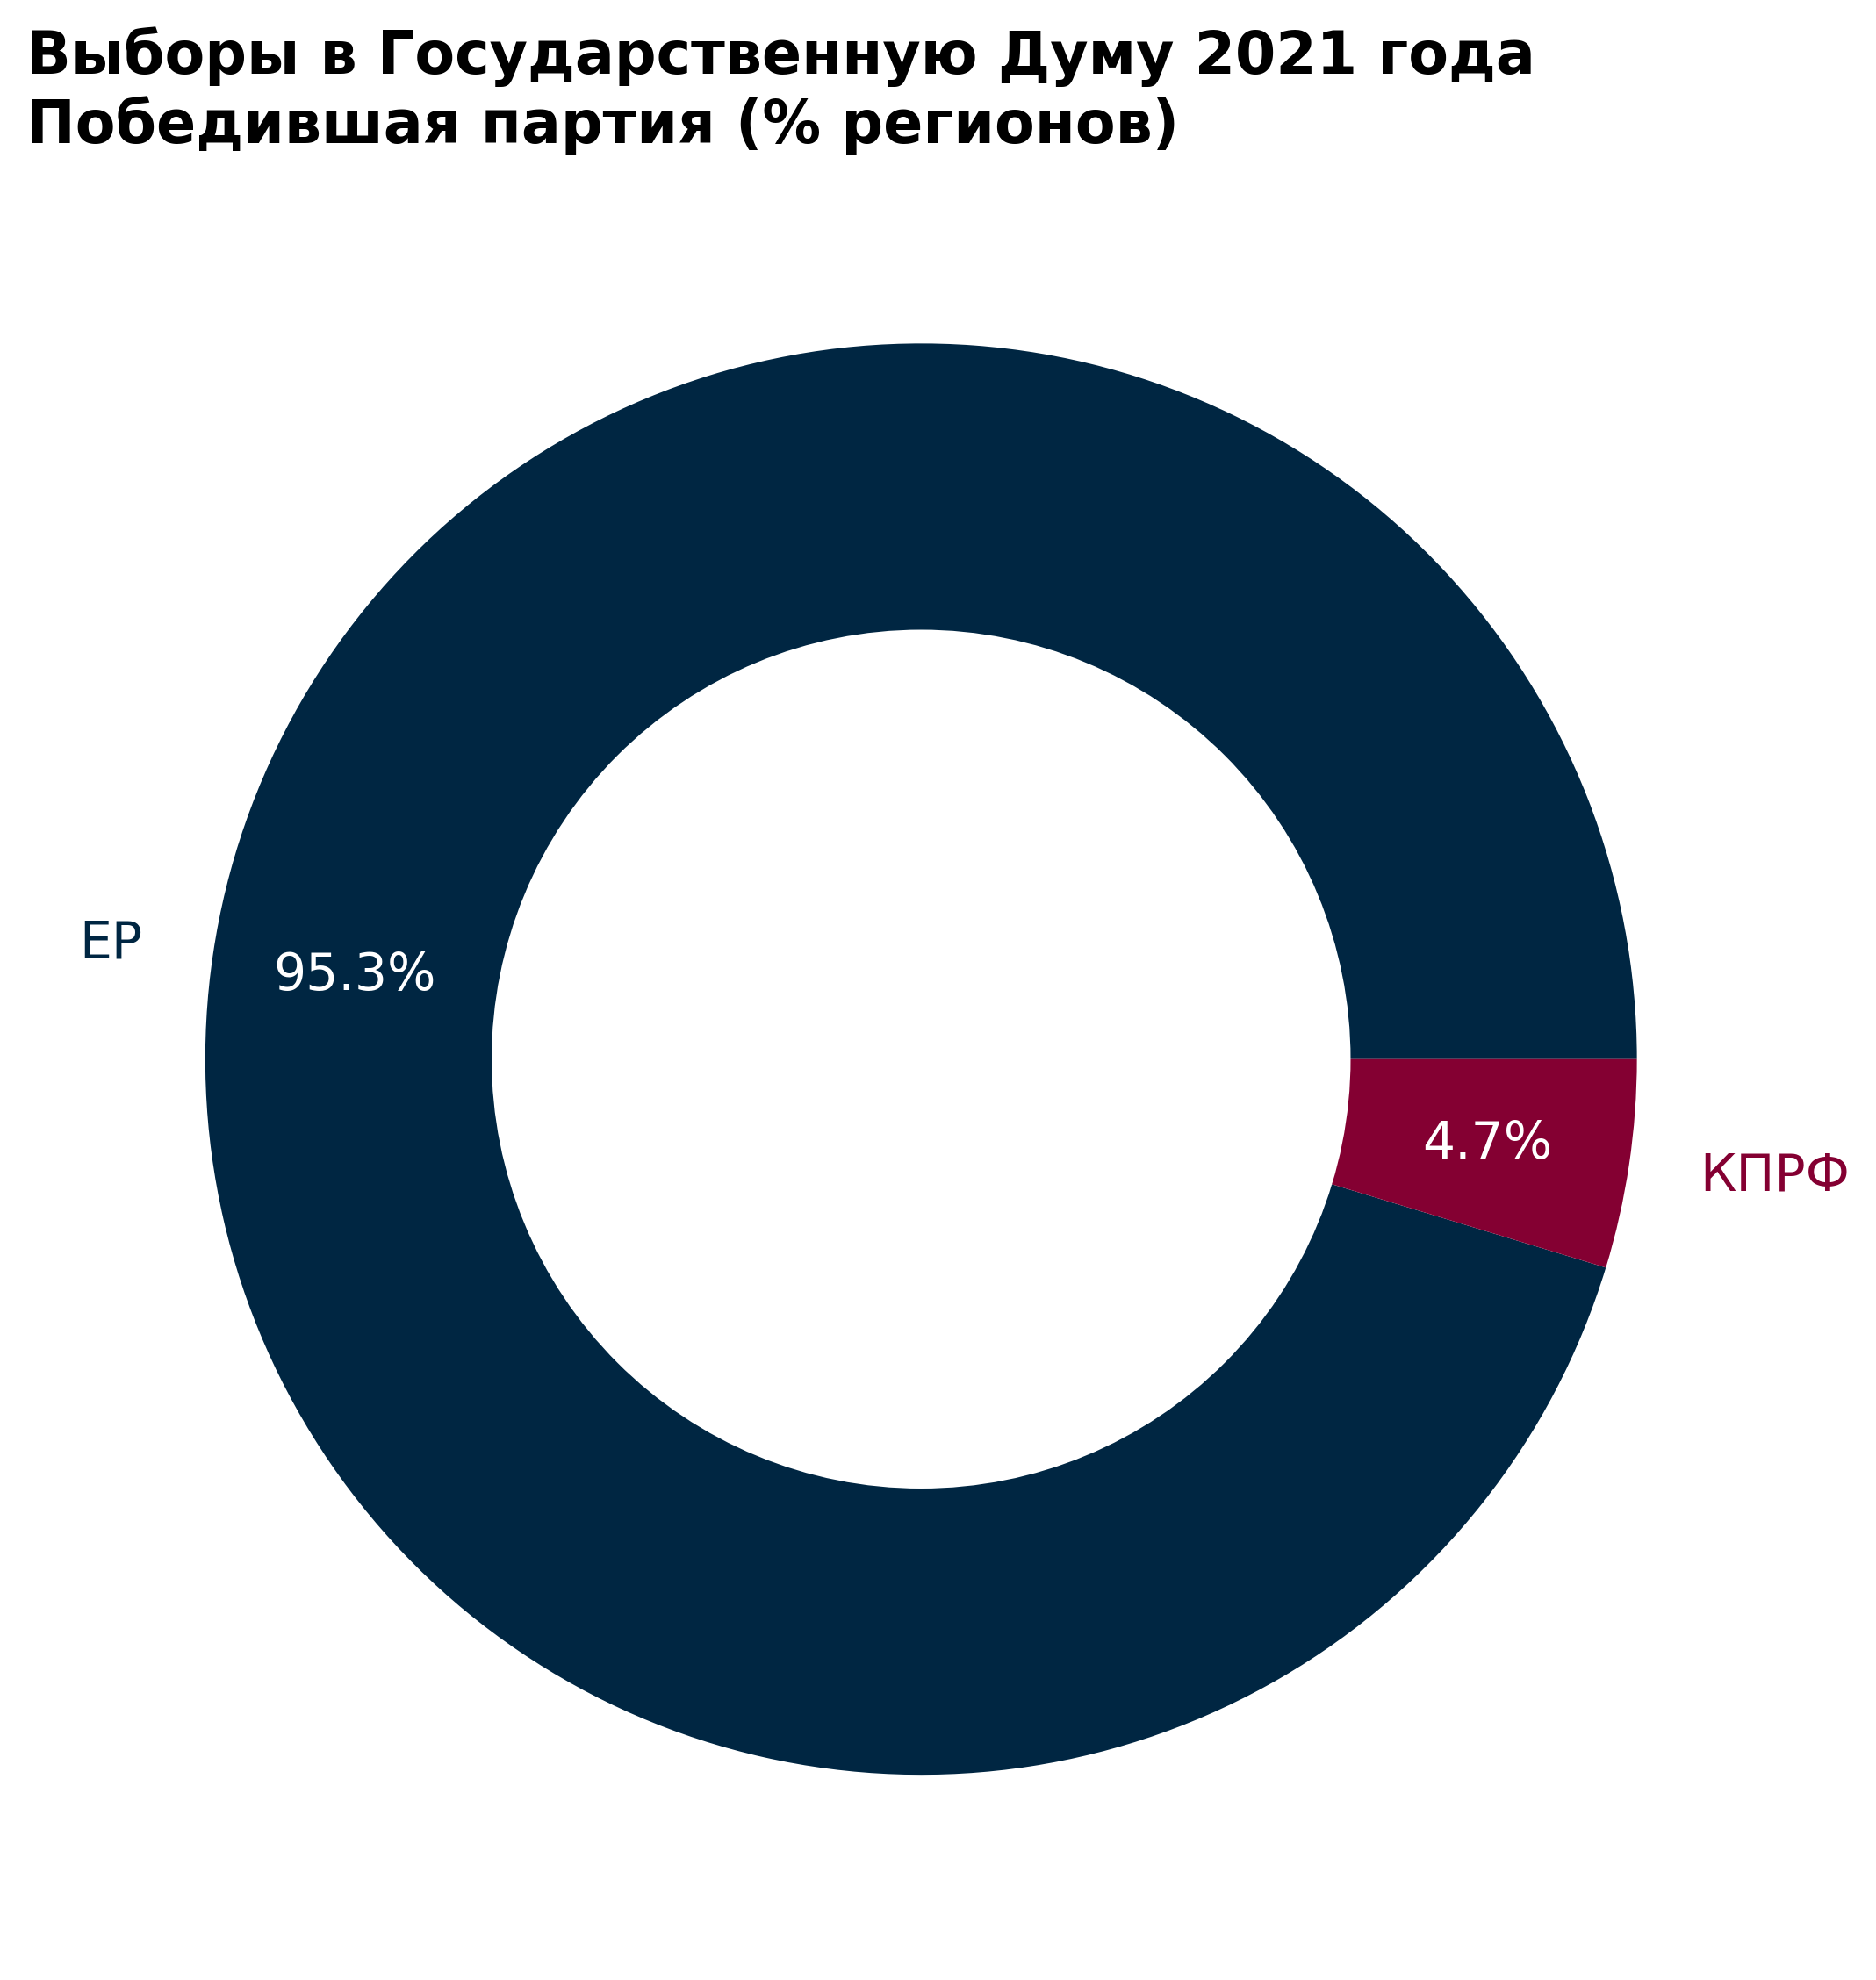

In [34]:
cols = ["#002642", "#840032"]

fig, ax = plt.subplots(figsize = (16, 9), dpi = 300)

# тут нет color в textprops
wedges, texts, autotexts = ax.pie(vals, 
                                  labels = labs,
                                  colors = cols,
                                  autopct = "%.1f%%",
                                  pctdistance = 0.8,
                                  textprops = dict(fontsize = 14));

# тут за каждой подписью с % устанавливаем белый цвет

for autotext in autotexts:
    autotext.set_color("white")
    
# а тут за каждой подписью с названием устанавливаем цвет сектора

for w, t in zip(wedges, texts):
    t.set_color(w.get_facecolor())

ax.set_title("Выборы в Государственную Думу 2021 года\nПобедившая партия (% регионов)", 
            fontsize = 16, 
            loc = "left", 
            fontweight = "bold");

centre_circle = plt.Circle((0, 0), 0.6, fc = "white")
fig.gca().add_artist(centre_circle);

Есть! Подход опять же, универсальный, если будет десять секторов, а не два, удобство цикла и автоматического «копирования» цвета будет более очевидно.

Для ответа на второй вопрос сделаем вариант диаграммы, где один сектор – темный, а второй – светлый:

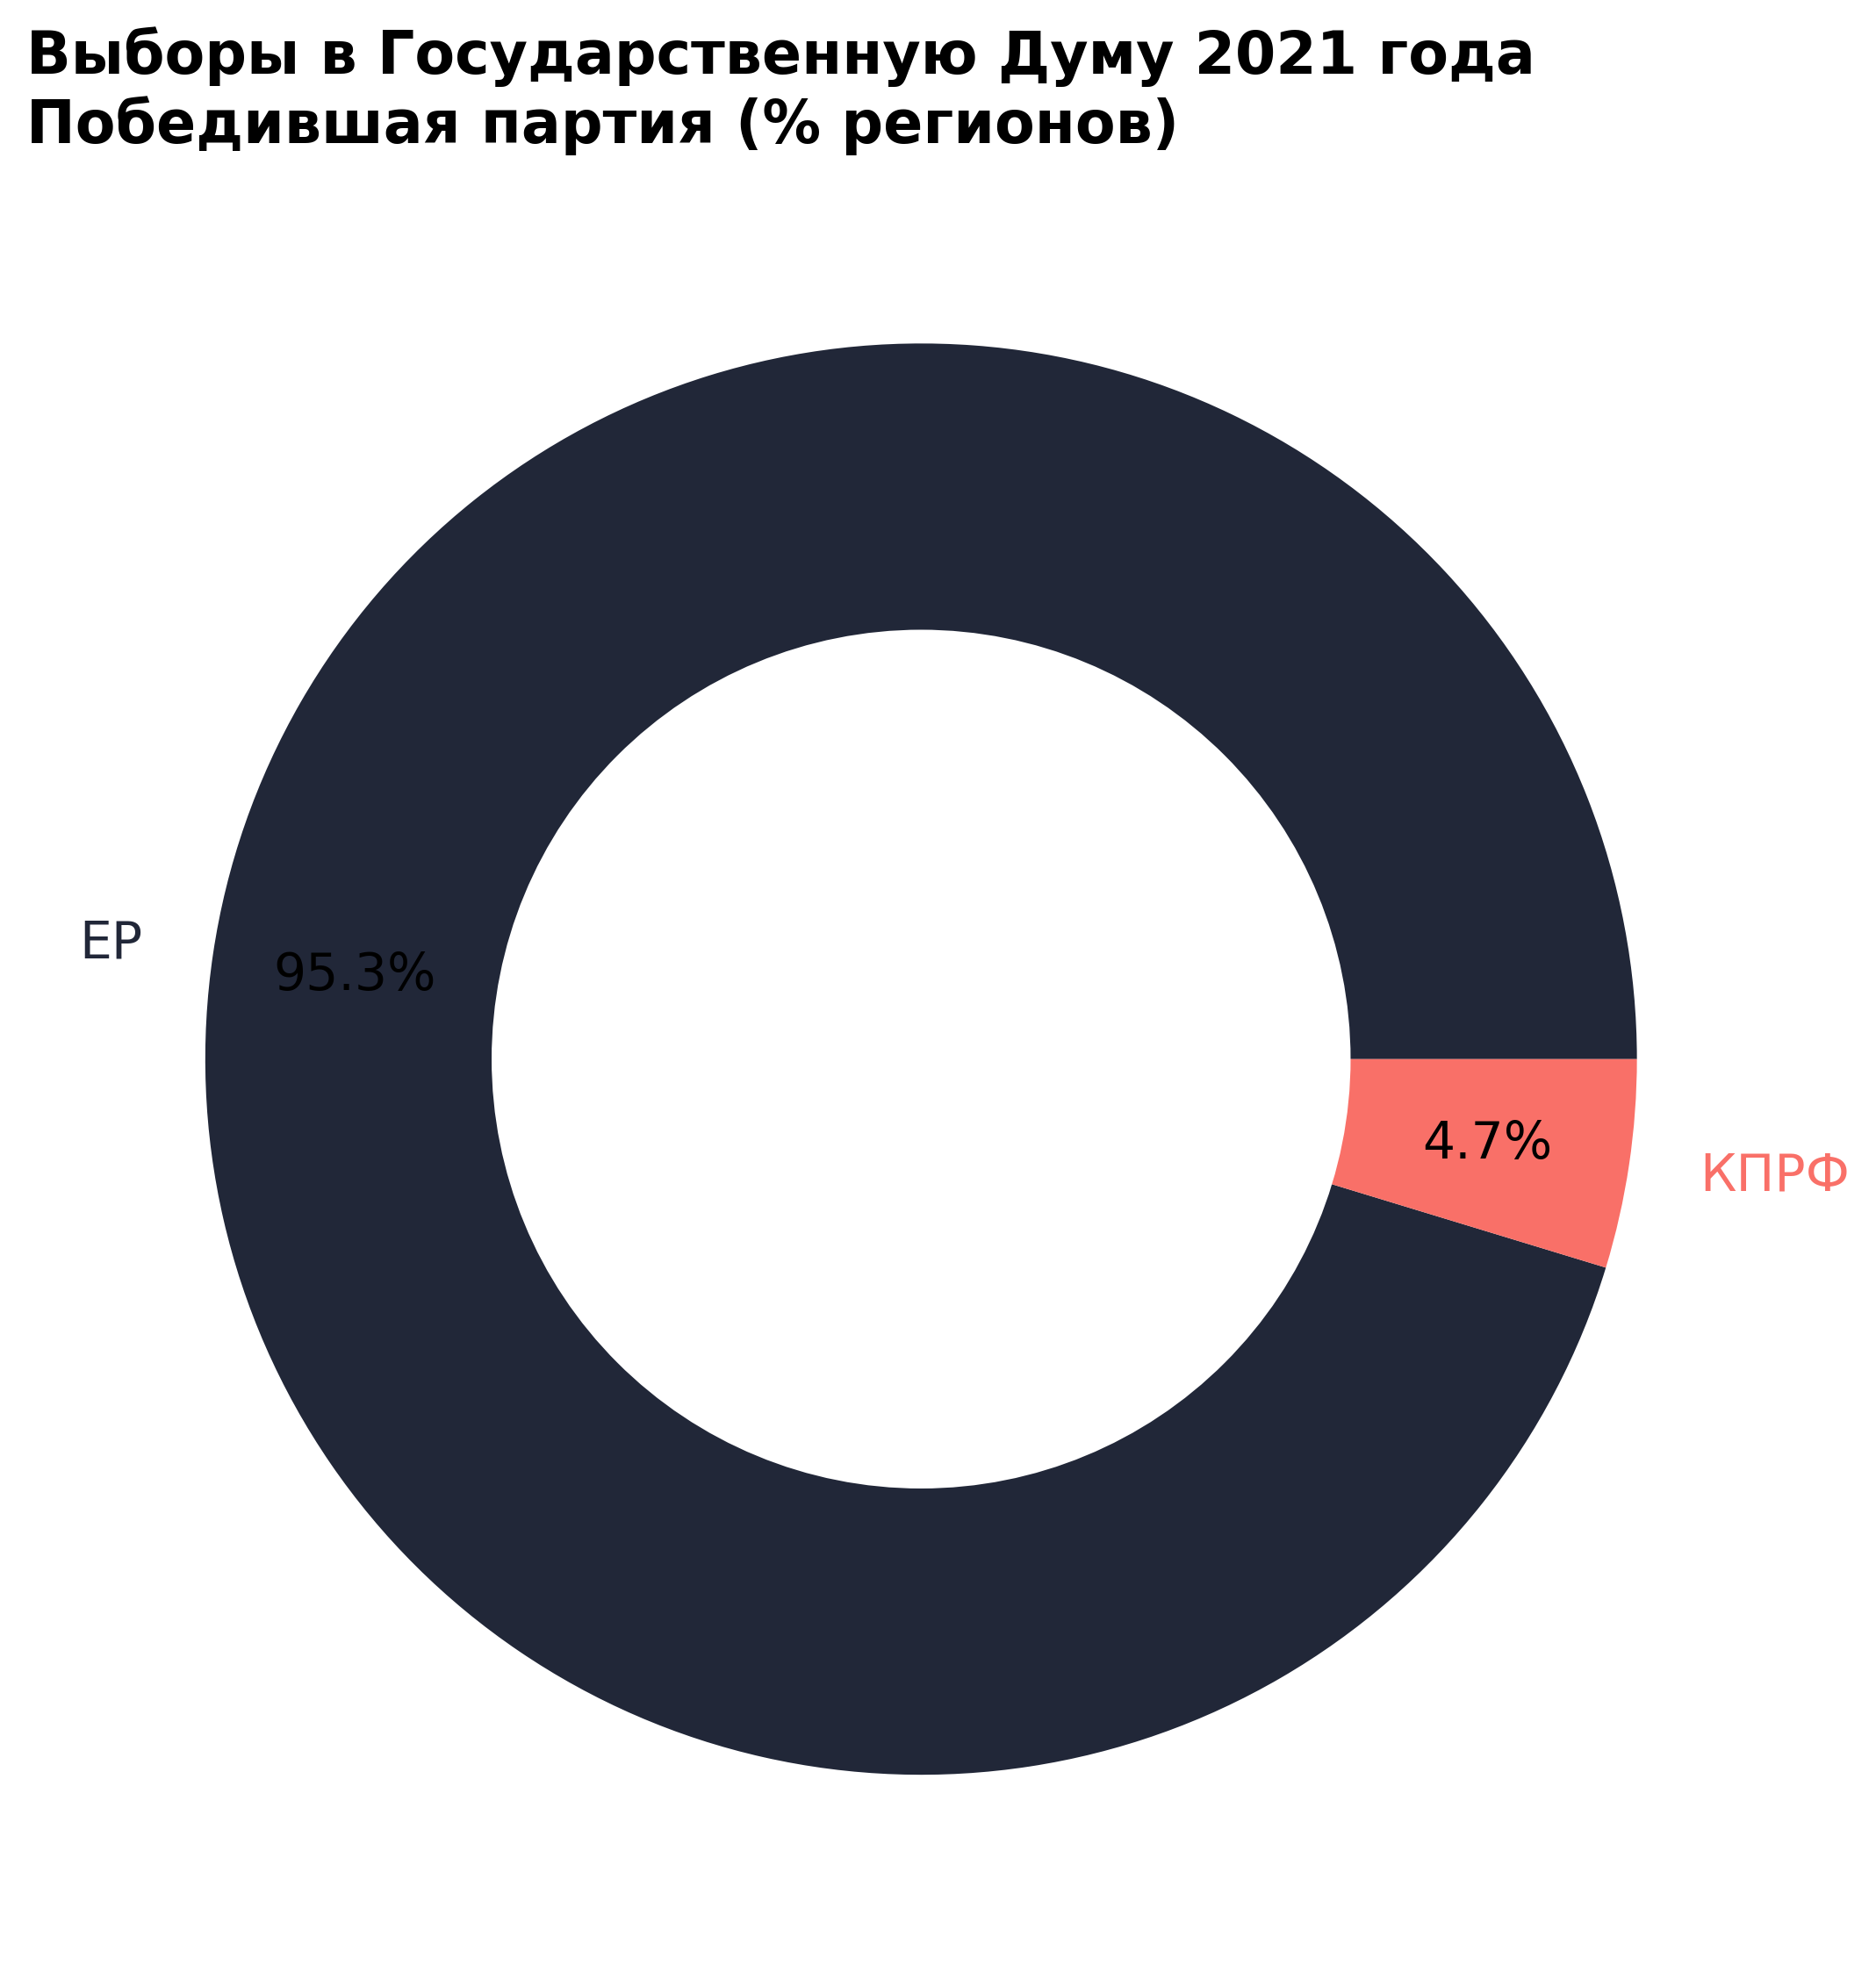

In [35]:
# просто другие цвета
# цикла для подписей с % пока нет

cols = ["#212738", "#f97068"]

fig, ax = plt.subplots(figsize = (16, 9), dpi = 300)

wedges, texts, autotexts = ax.pie(vals, 
                                  labels = labs,
                                  colors = cols,
                                  autopct = "%.1f%%",
                                  pctdistance = 0.8,
                                  textprops = dict(fontsize = 14));
    
# за каждой подписью с названием устанавливаем цвет сектора
for w, t in zip(wedges, texts):
    t.set_color(w.get_facecolor())

ax.set_title("Выборы в Государственную Думу 2021 года\nПобедившая партия (% регионов)", 
            fontsize = 16, 
            loc = "left", 
            fontweight = "bold");

centre_circle = plt.Circle((0, 0), 0.6, fc = "white")
fig.gca().add_artist(centre_circle);

Как можно догадаться, здесь снова понадобится перебор пар, только сами сектора `wedges` нам сейчас не нужны. Нам пригодятся пары *подпись с процентами-цвет*, а цвета мы будем брать из готового списка, который сами создадим. Пусть это будет список из двух цветов, белый цвет для первого темного сектора, черный цвет для второго светлого сектора.

In [36]:
perc_cols = ["white", "black"]

wedges, texts, autotexts = ax.pie(vals, 
                                  labels = labs,
                                  colors = cols,
                                  autopct = "%.1f%%",
                                  pctdistance = 0.8,
                                  textprops = dict(fontsize = 14));

for a, c in zip(autotexts, perc_cols):
    print(a, c)

Text(-0.7912732877353266, 0.11784135147106507, '95.3%') white
Text(0.7912732891144644, -0.11784134221052163, '4.7%') black


Осталось перенести этот цикл в основной код, снова задействовав `.set_color()`:

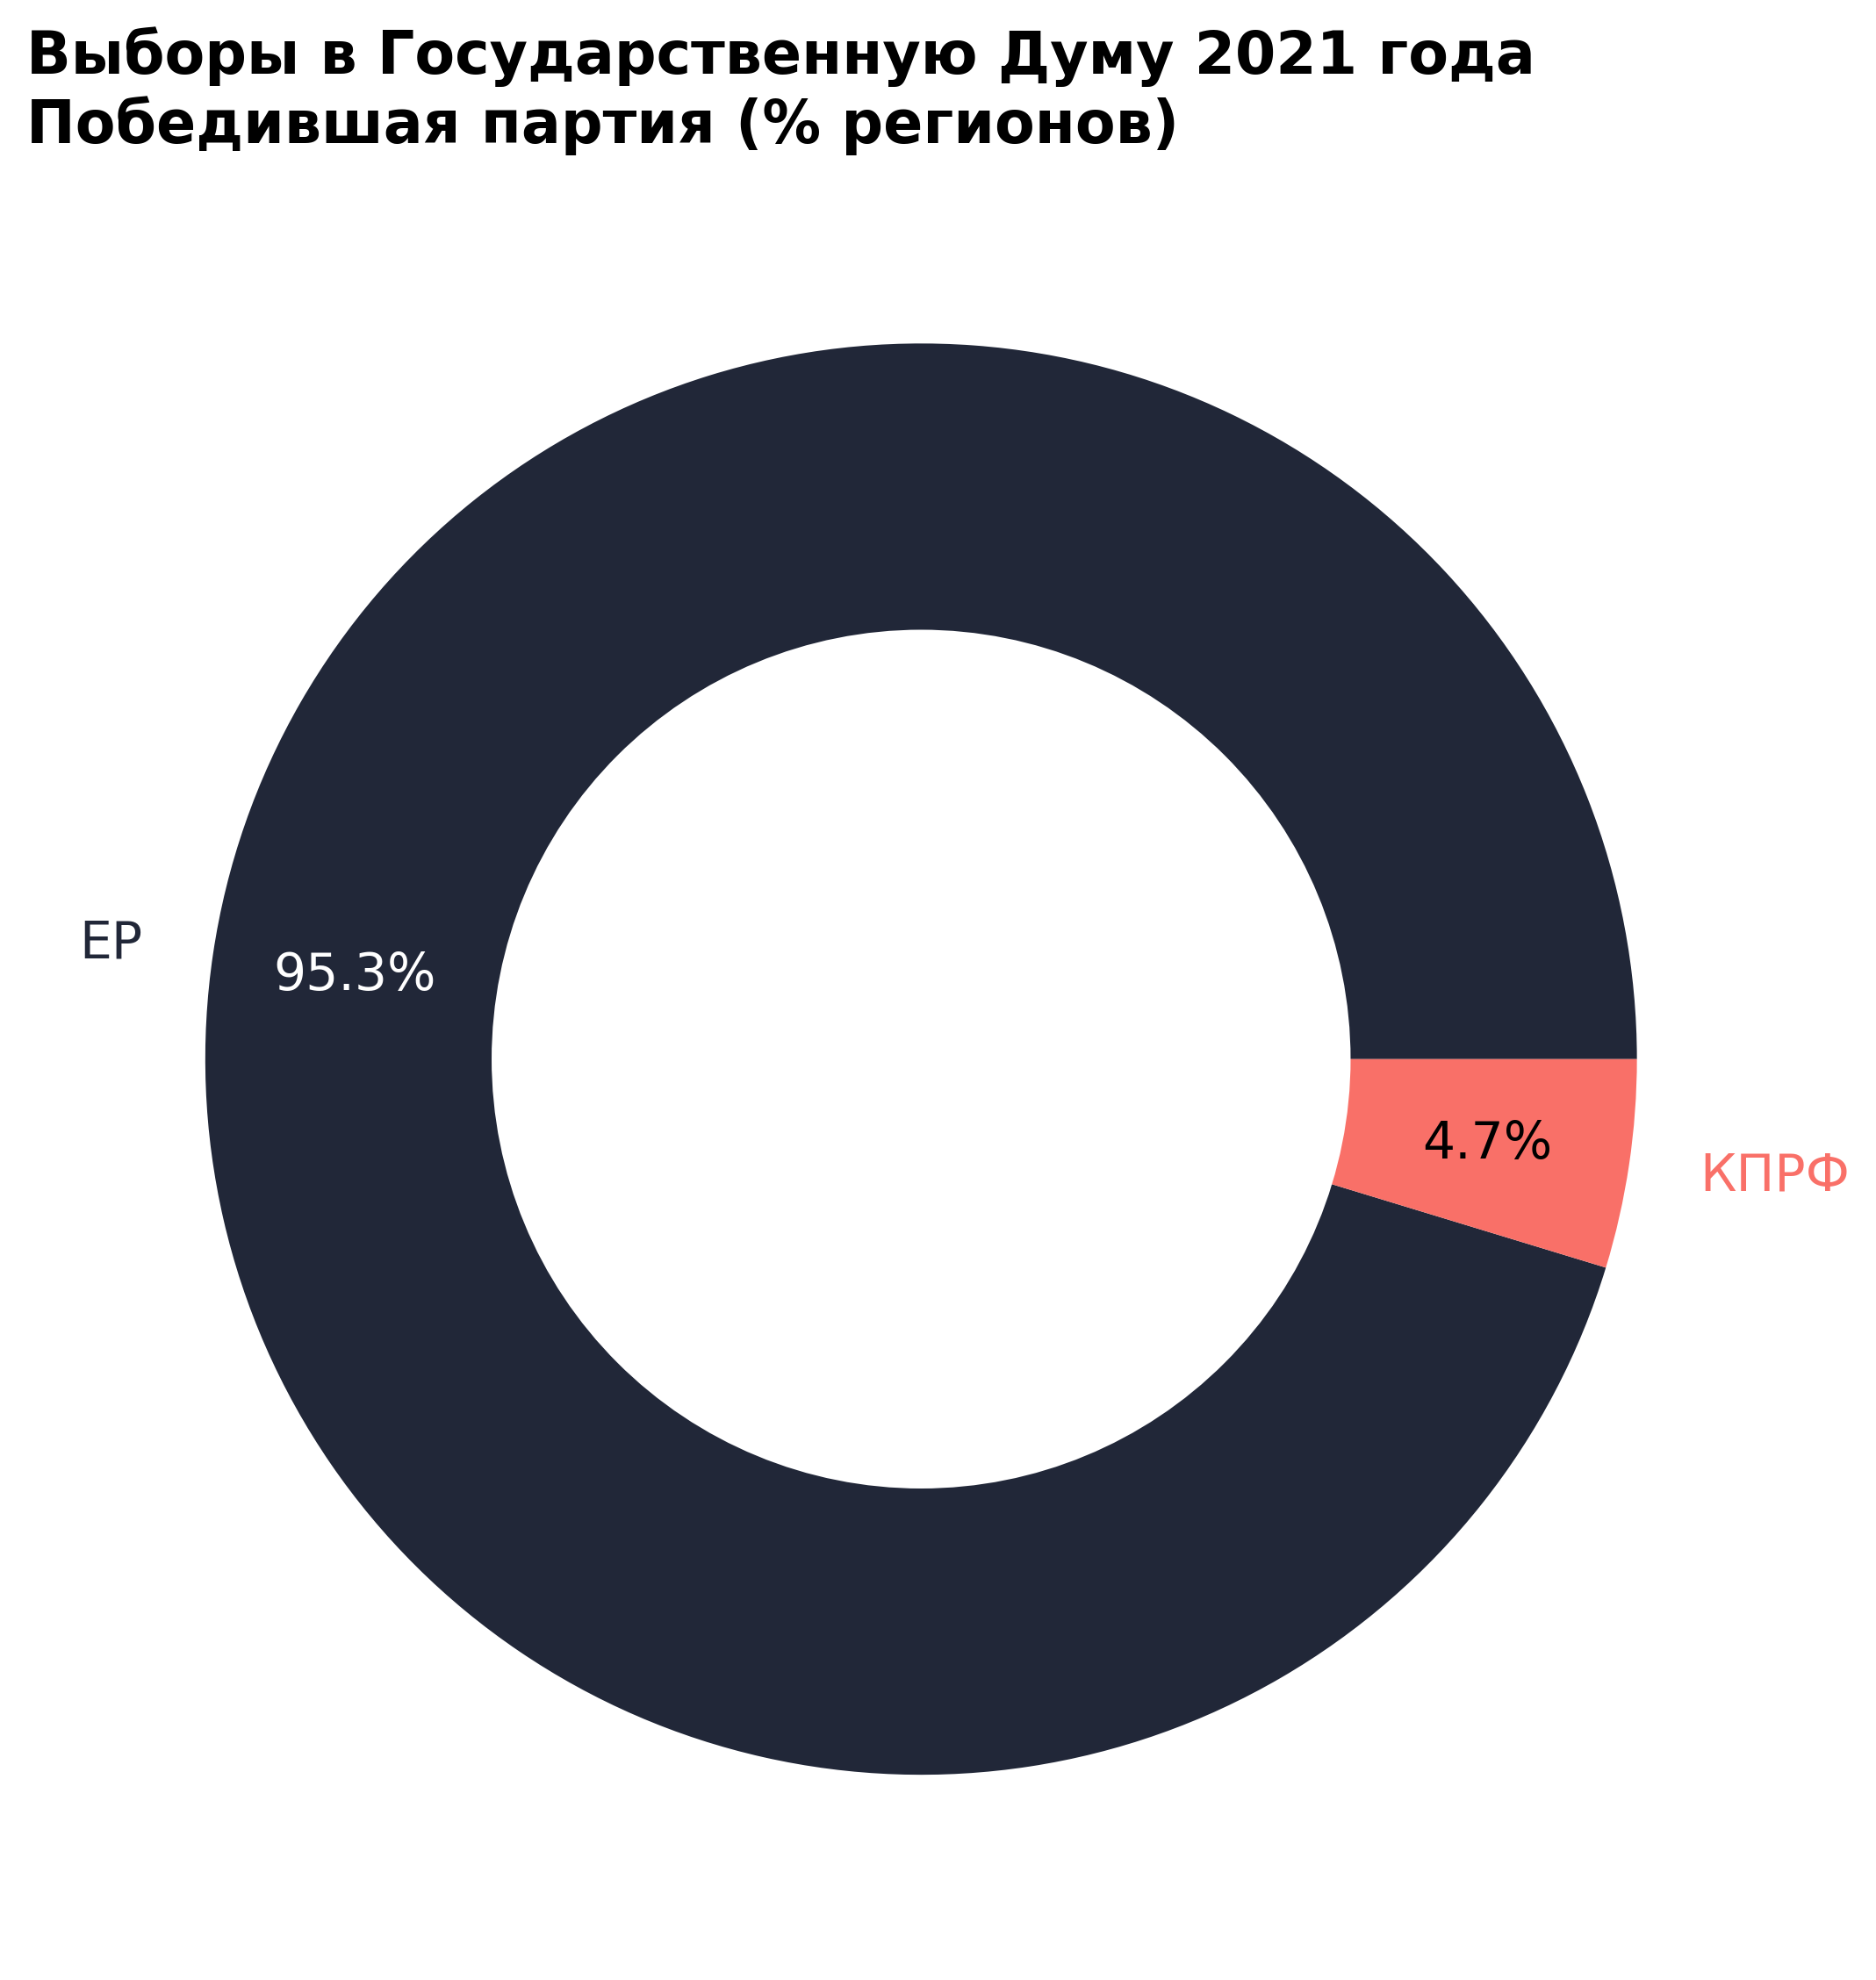

In [37]:
cols = ["#212738", "#f97068"]

fig, ax = plt.subplots(figsize = (16, 9), dpi = 300)

wedges, texts, autotexts = ax.pie(vals, 
                                  labels = labs,
                                  colors = cols,
                                  autopct = "%.1f%%",
                                  pctdistance = 0.8,
                                  textprops = dict(fontsize = 14));
    
# за каждой подписью с названием устанавливаем цвет сектора
for w, t in zip(wedges, texts):
    t.set_color(w.get_facecolor())

# за каждой подписью с % устанавливаем цвет из perc_cols
perc_cols = ["white", "black"]
for a, c in zip(autotexts, perc_cols):
    a.set_color(c)

ax.set_title("Выборы в Государственную Думу 2021 года\nПобедившая партия (% регионов)", 
            fontsize = 16, 
            loc = "left", 
            fontweight = "bold");

centre_circle = plt.Circle((0, 0), 0.6, fc = "white")
fig.gca().add_artist(centre_circle);

В заключение этого бесконечного практикума не могу не добавить ответ на вопрос, который когда-то возник у меня. А можно ли автоматически определять, является ли цвет заливки темным, чтобы в таком случае делать подписи белыми? В случае, если для заливки используется какая-нибудь градиентная растяжка одного цвета, от светлого к темному или наоборот, это сделать несложно. А если цвета могут быть любыми? (Если кажется, что это излишние заморочки, проще список цветов для подписей составить, представьте, что вам нужно раскрасить большую карту с кучей областей/районов, и нужны разные отличающиеся друг от друга цвета, которые могут быть и светлыми, и темными вперемешку).

Ответ – можно. Оказывается, существует альтернативная схема цвета [HSP](https://alienryderflex.com/hsp.html), которая позволяет оценить его яркость. Если воспользоваться формулой, предложенной автором этой схемы, можно получить значения яркости в виде одного числа. Выберем цвет первого сектора и разберем его на части:

In [38]:
fill = wedges[0].get_facecolor()
print(fill)

(0.12941176470588237, 0.15294117647058825, 0.2196078431372549, 1.0)


In [39]:
r, g, b, a = fill
print(r)
print(g)
print(b)
print(a)

0.12941176470588237
0.15294117647058825
0.2196078431372549
1.0


Переведем все в обычную схему RGB – домножим `r`, `g` и `b` на 255:

In [40]:
R, G, B = r * 255, g * 255, b * 255

Воспользуемся формулой и получим яркость цвета:

In [41]:
hsp = (0.299 * R ** 2 + 0.587 * G ** 2 + 0.114 * B ** 2) ** 0.5
print(hsp)

39.69813597639063


Теперь можно выбрать пороговое значение для яркости (чем больше, тем светлее цвет) и определить функцию, которая возвращает цвет для подписей на основе цвета заливки: черный, если цвет светлый, черный, если цвет темный. Предлагаю согласиться со значением 127.5 [отсюда](https://awik.io/determine-color-bright-dark-using-javascript/), это просто середина отрезка от минимального значения 0 до максимального 255:

In [42]:
def get_bw(fill):
    r, g, b, a = fill
    R, G, B = r * 255, g * 255, b * 255
    hsp = (0.299 * R ** 2 + 0.587 * G ** 2 + 0.114 * B ** 2) ** 0.5
    
    # больше 127.5 -> светлый -> подписи черные
    # иначе -> темный -> подписи белые
    
    if hsp > 127.5:
        label_color = "black"
    else:
        label_color = "white"
    return label_color

Осталось применить эту функцию в цикле при переборе пар *цвет подписи-сектор*:

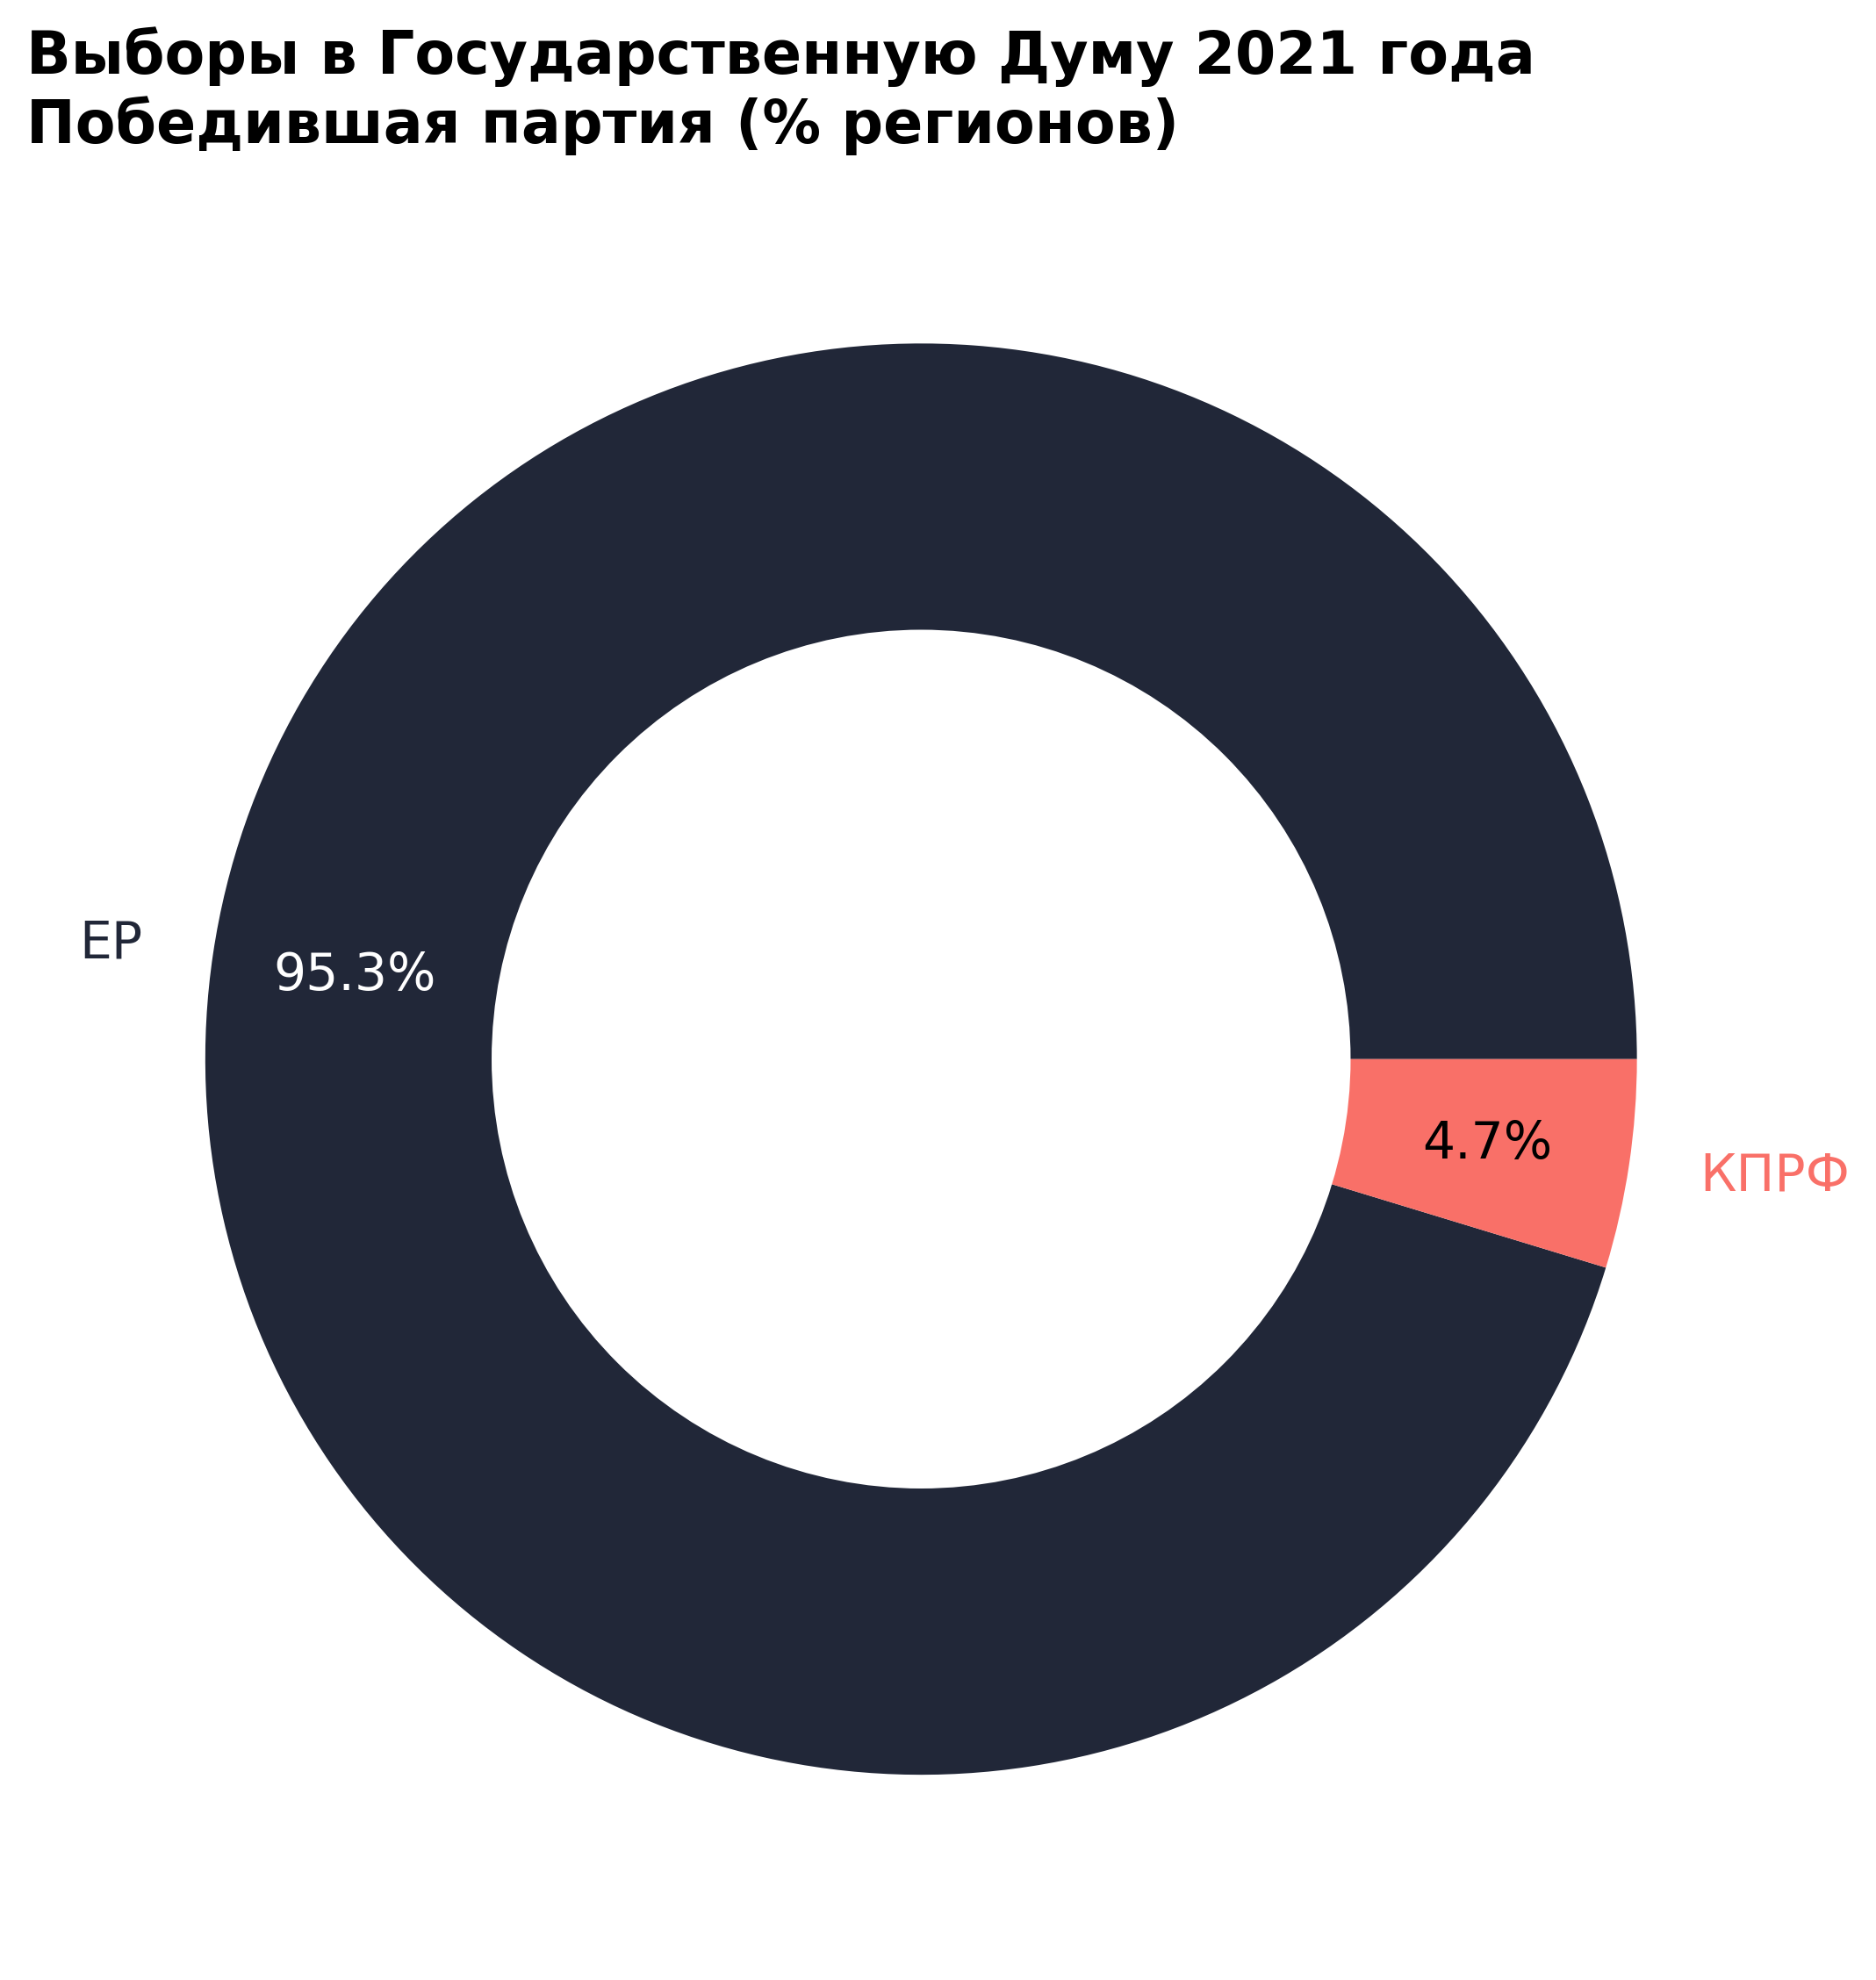

In [43]:
cols = ["#212738", "#f97068"]

fig, ax = plt.subplots(figsize = (16, 9), dpi = 300)

wedges, texts, autotexts = ax.pie(vals, 
                                  labels = labs,
                                  colors = cols,
                                  autopct = "%.1f%%",
                                  pctdistance = 0.8,
                                  textprops = dict(fontsize = 14));
    
# за каждой подписью с названием устанавливаем цвет сектора
for w, t in zip(wedges, texts):
    t.set_color(w.get_facecolor())

# за каждой подписью с % закрепляем цвет – получаем яркость для 
# цвета сектора w и задействуем функцию get_bw()
for a, w in zip(autotexts, wedges):
    a_color = get_bw(w.get_facecolor())
    a.set_color(a_color)

ax.set_title("Выборы в Государственную Думу 2021 года\nПобедившая партия (% регионов)", 
            fontsize = 16, 
            loc = "left", 
            fontweight = "bold");

centre_circle = plt.Circle((0, 0), 0.6, fc = "white")
fig.gca().add_artist(centre_circle);

Теперь точно всё! :)